<a href="https://colab.research.google.com/github/radhakrishnan-omotec/lung-repository/blob/main/5_Lung_Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/radhakrishnan-omotec/lung-repository.git

Cloning into 'lung-repository'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 63 (delta 39), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (63/63), 6.99 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (39/39), done.


#EDA:
Analysis on the collected data & Generating various visualizations (scatter plots, histograms, bar plots) to explore relationships between different variables of the dataset.

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
# Load the data from the CSV file
df = pd.read_csv('/content/lung-repository/cancer patient data (D0).csv')

df.head()


,INDEX,PATIENT_ID,RACE,AGE,GENDER,AIR_POLLUTION,ALCOHOL_USE,DUST_ALLERGY,OCCUPATIONAL_HAZARDS,GENETIC_RISK,...,WEIGHT_LOSS,SHORTNESS_OF_BREATH,WHEEZING,SWALLOWING_DIFFICULTY,CLUBBING_OF_FINGER_NAILS,FREQUENT_COLD,DRY_COUGH,SNORING,LEVEL,LUNG_CANCER
0,1,P1,Asian,33,1,2,4,5,4,3,...,4,2,2,3,1,2,3,4,1,NO
1,2,P2,Asian,17,1,3,1,5,3,4,...,3,7,8,6,2,1,7,2,2,YES
2,3,P3,Asian,35,1,4,5,6,5,5,...,7,9,2,1,4,6,7,2,3,YES
3,4,P4,Asian,37,1,7,7,7,7,6,...,2,3,1,4,5,6,7,5,3,YES
4,5,P5,Asian,46,1,6,8,7,7,7,...,2,4,1,4,2,4,2,3,3,YES


#EDA IMPLEMENATION:


In [4]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('/content/lung-repository/cancer patient data (D0).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of the dataset:
   INDEX PATIENT_ID   RACE  AGE  GENDER  AIR_POLLUTION  ALCOHOL_USE  \
0      1         P1  Asian   33       1              2            4   
1      2         P2  Asian   17       1              3            1   
2      3         P3  Asian   35       1              4            5   
3      4         P4  Asian   37       1              7            7   
4      5         P5  Asian   46       1              6            8   

   DUST_ALLERGY  OCCUPATIONAL_HAZARDS  GENETIC_RISK  ...  WEIGHT_LOSS  \
0             5                     4             3  ...            4   
1             5                     3             4  ...            3   
2             6                     5             5  ...            7   
3             7                     7             6  ...            2   
4             7                     7             7  ...            2   

   SHORTNESS_OF_BREATH  WHEEZING  SWALLOWING_DIFFICULTY  \
0                    2         2              

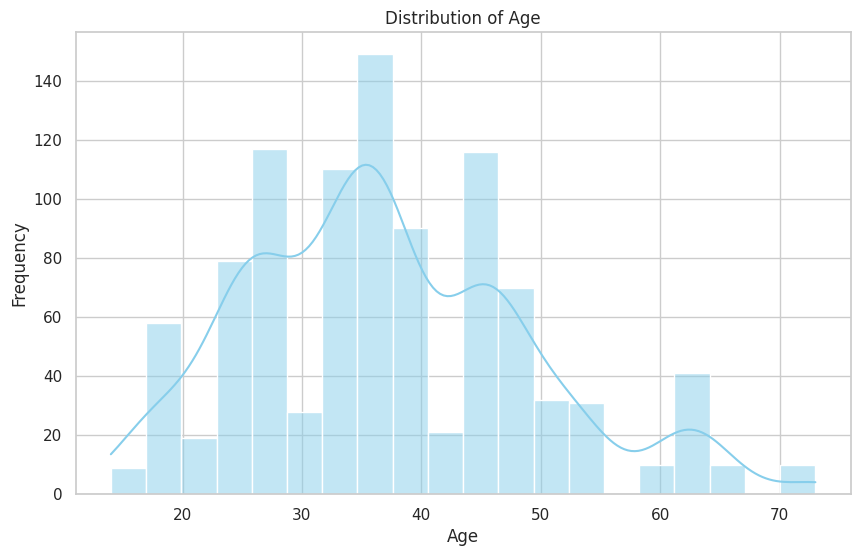

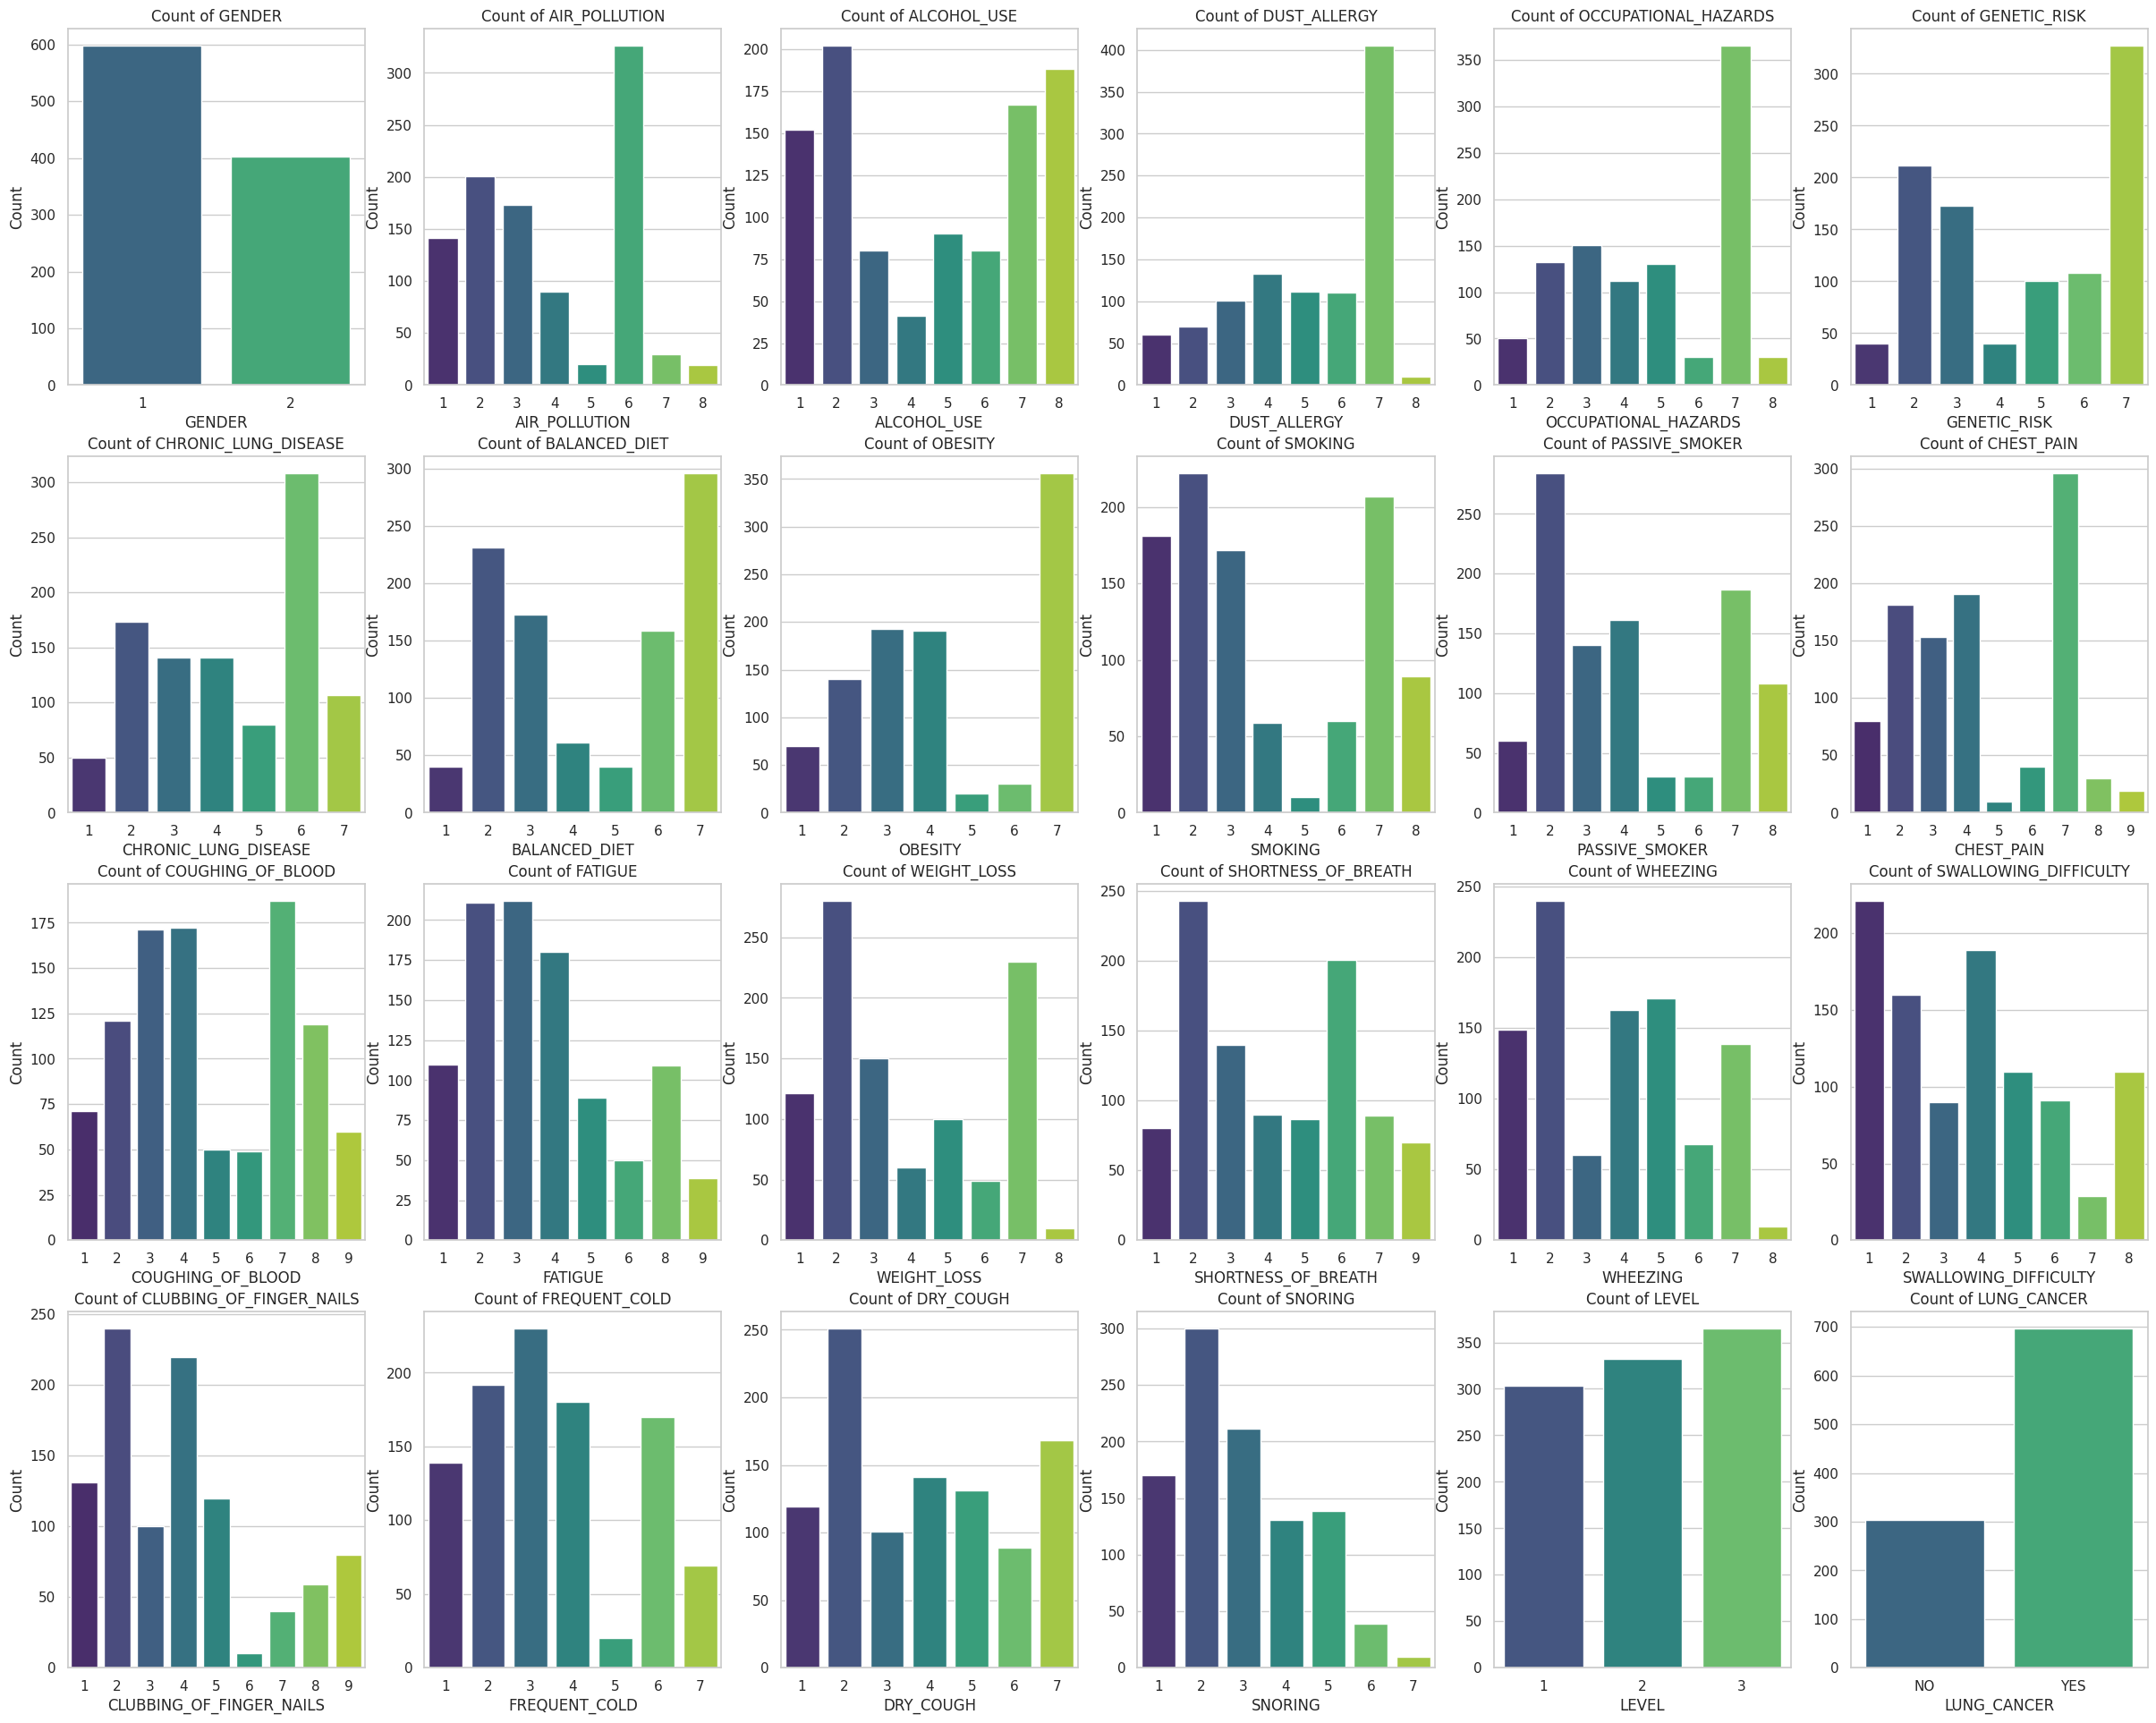

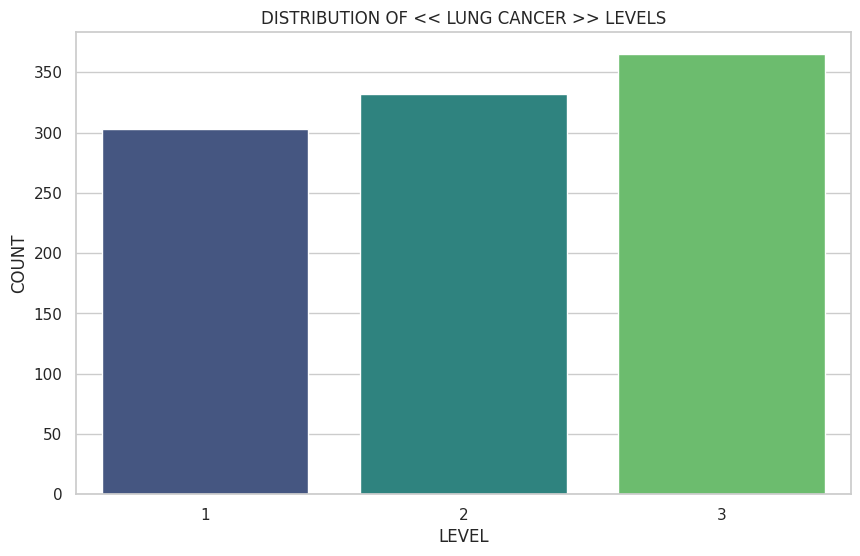

<Figure size 640x480 with 0 Axes>

In [8]:
# Visualize the distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Visualize Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['GENDER', 'AIR_POLLUTION', 'ALCOHOL_USE', 'DUST_ALLERGY', 'OCCUPATIONAL_HAZARDS',
                        'GENETIC_RISK', 'CHRONIC_LUNG_DISEASE', 'BALANCED_DIET', 'OBESITY', 'SMOKING',
                        'PASSIVE_SMOKER', 'CHEST_PAIN', 'COUGHING_OF_BLOOD', 'FATIGUE', 'WEIGHT_LOSS',
                        'SHORTNESS_OF_BREATH', 'WHEEZING', 'SWALLOWING_DIFFICULTY', 'CLUBBING_OF_FINGER_NAILS',
                        'FREQUENT_COLD', 'DRY_COUGH', 'SNORING', 'LEVEL', 'LUNG_CANCER']

plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 6, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

# Visualize the distribution of the 'LEVEL' column
plt.figure(figsize=(10, 6))
sns.countplot(x='LEVEL', data=df, palette='viridis')
plt.title('DISTRIBUTION OF << LUNG CANCER >> LEVELS')
plt.xlabel('LEVEL')
plt.ylabel('COUNT')
plt.show()

plt.tight_layout()
plt.show()

# 1. EDA using Scatter Plots:

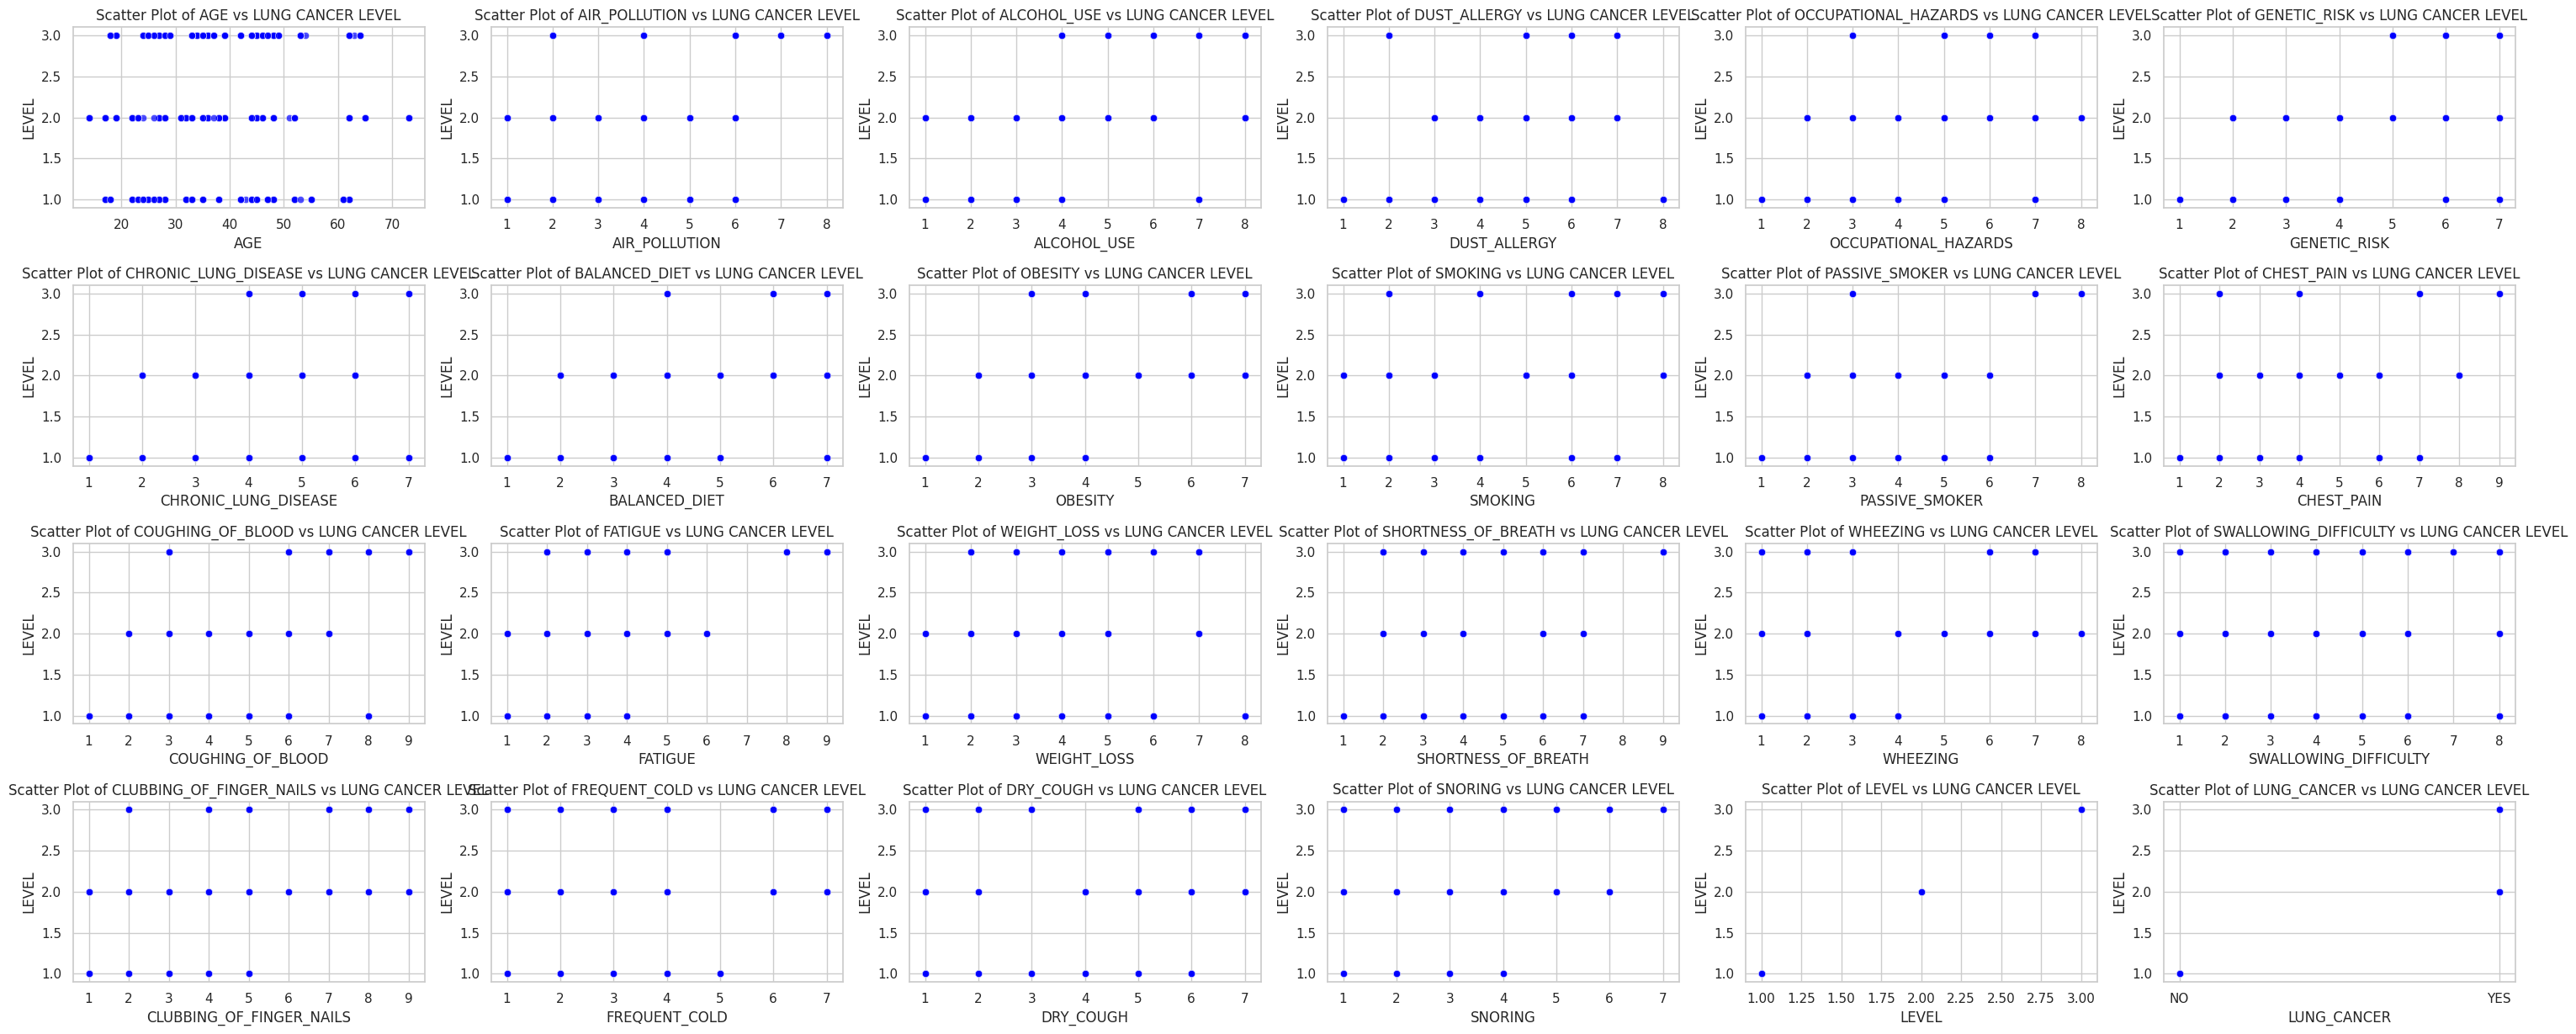

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Specify the columns for the scatter plot
selected_columns = ['AGE', 'AIR_POLLUTION', 'ALCOHOL_USE', 'DUST_ALLERGY', 'OCCUPATIONAL_HAZARDS',
                    'GENETIC_RISK', 'CHRONIC_LUNG_DISEASE', 'BALANCED_DIET', 'OBESITY', 'SMOKING',
                    'PASSIVE_SMOKER', 'CHEST_PAIN', 'COUGHING_OF_BLOOD', 'FATIGUE', 'WEIGHT_LOSS',
                    'SHORTNESS_OF_BREATH', 'WHEEZING', 'SWALLOWING_DIFFICULTY', 'CLUBBING_OF_FINGER_NAILS',
                    'FREQUENT_COLD', 'DRY_COUGH', 'SNORING', 'LEVEL', 'LUNG_CANCER']

# Create subplots for each column
plt.figure(figsize=(30, 15))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(5, 6, i)
    sns.scatterplot(x=df[column], y=df['LEVEL'], color='blue', alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs LUNG CANCER LEVEL')
    plt.xlabel(column)
    plt.ylabel('LEVEL')

plt.tight_layout()
plt.show()

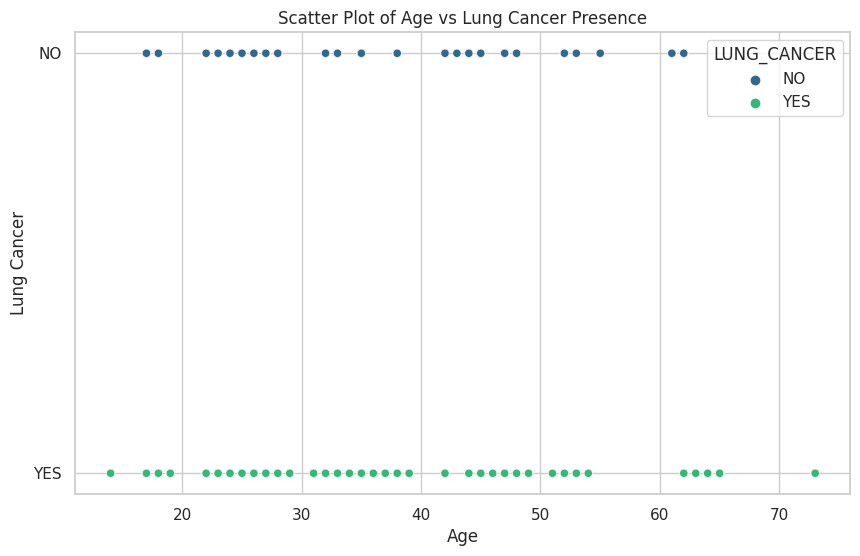

In [10]:
# Scatter plot for AGE vs LUNG_CANCER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='LUNG_CANCER', data=df, hue='LUNG_CANCER', palette='viridis')
plt.title('Scatter Plot of Age vs Lung Cancer Presence')
plt.xlabel('Age')
plt.ylabel('Lung Cancer')
plt.show()


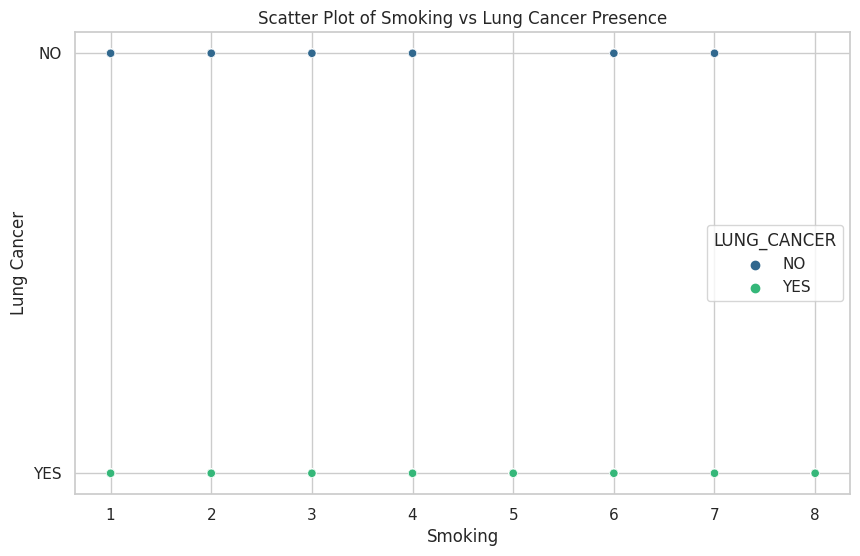

In [11]:
# Scatter plot for AGE vs LUNG_CANCER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SMOKING', y='LUNG_CANCER', data=df, hue='LUNG_CANCER', palette='viridis')
plt.title('Scatter Plot of Smoking vs Lung Cancer Presence')
plt.xlabel('Smoking')
plt.ylabel('Lung Cancer')
plt.show()


# 2. EDA using Histograms:

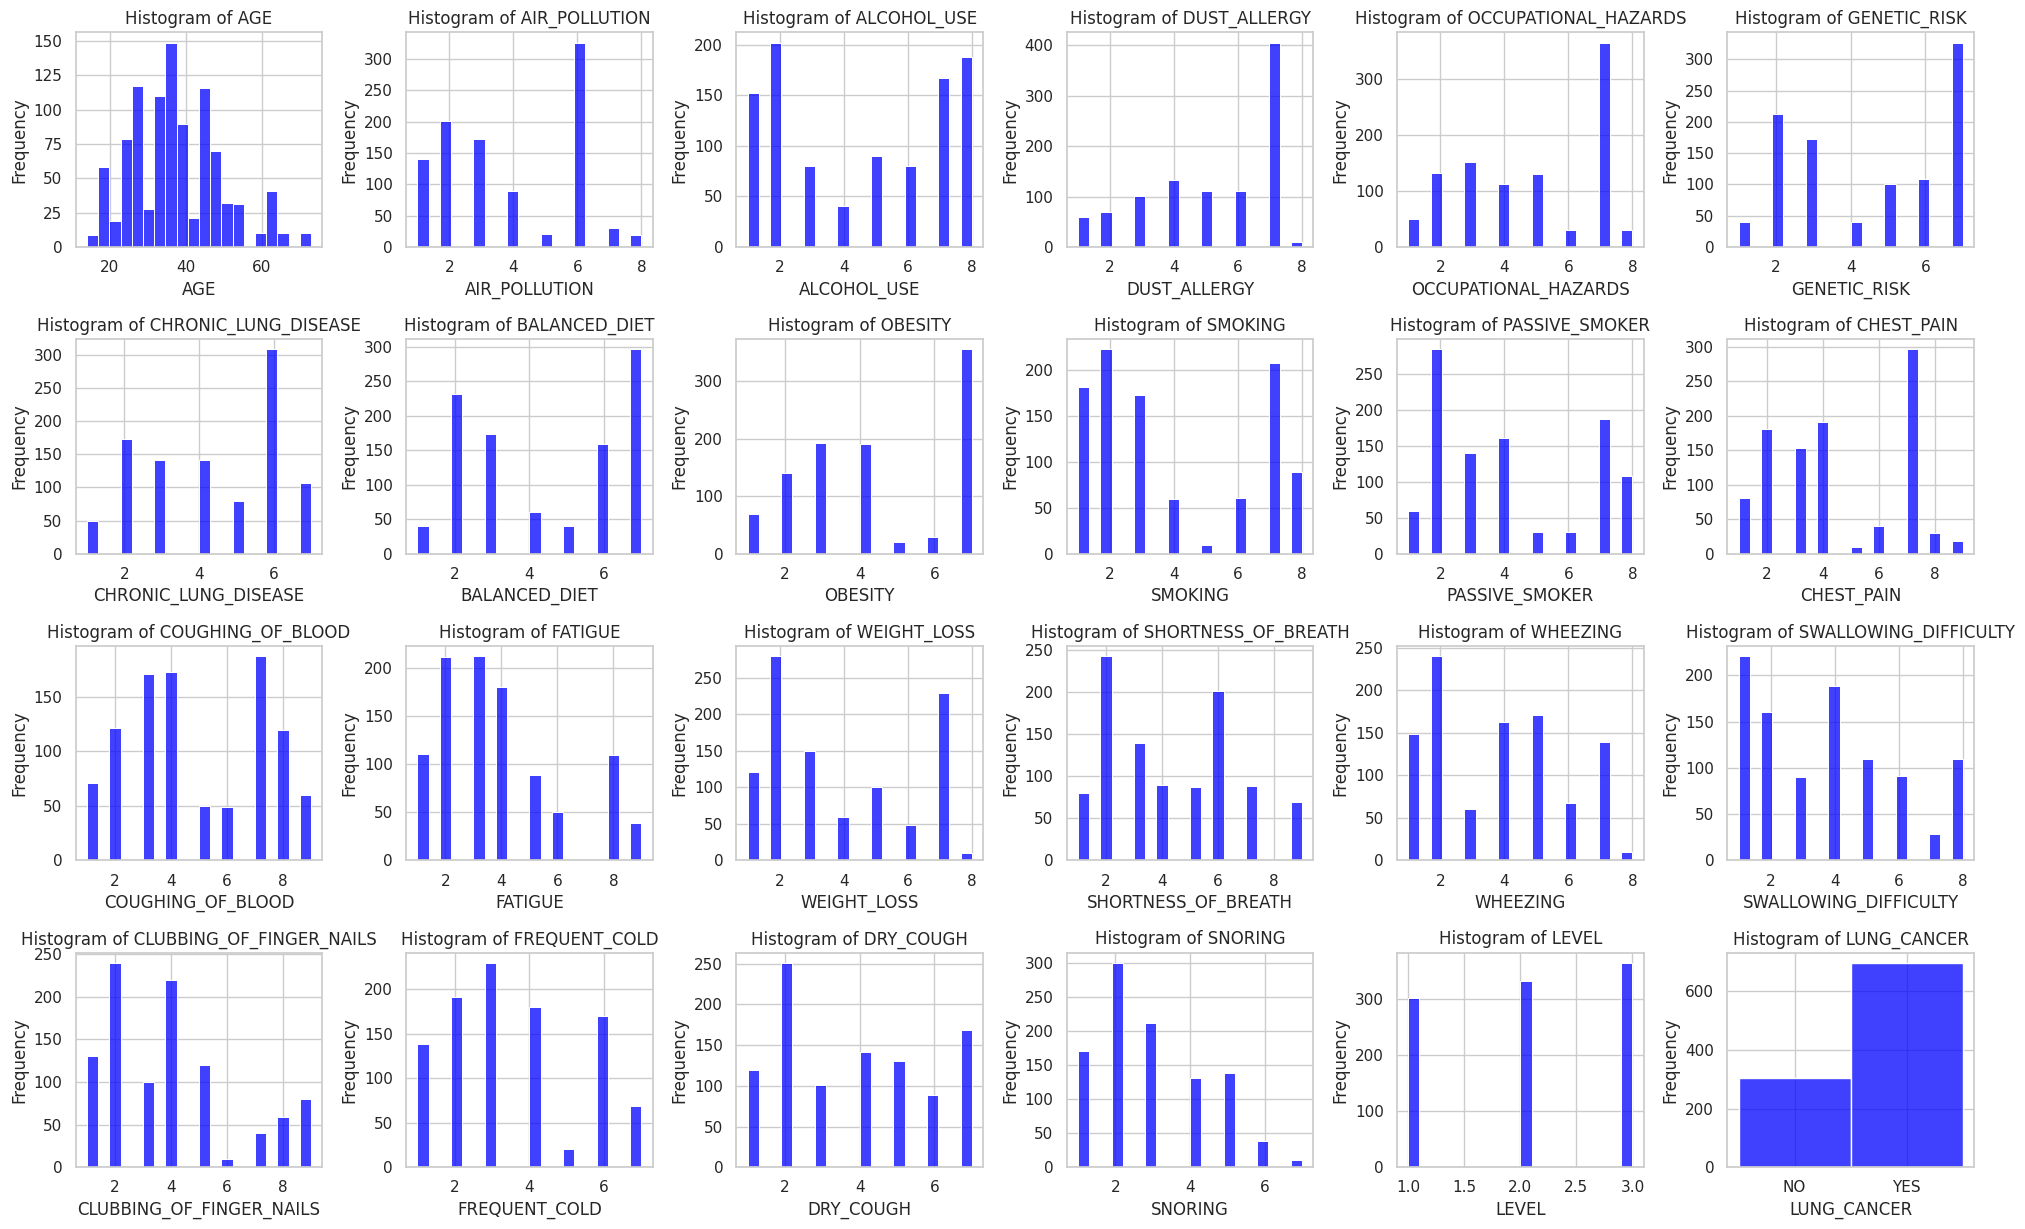

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Specify the columns for the consolidated histogram
selected_columns = ['AGE', 'AIR_POLLUTION', 'ALCOHOL_USE', 'DUST_ALLERGY', 'OCCUPATIONAL_HAZARDS',
                    'GENETIC_RISK', 'CHRONIC_LUNG_DISEASE', 'BALANCED_DIET', 'OBESITY', 'SMOKING',
                    'PASSIVE_SMOKER', 'CHEST_PAIN', 'COUGHING_OF_BLOOD', 'FATIGUE', 'WEIGHT_LOSS',
                    'SHORTNESS_OF_BREATH', 'WHEEZING', 'SWALLOWING_DIFFICULTY', 'CLUBBING_OF_FINGER_NAILS',
                    'FREQUENT_COLD', 'DRY_COUGH', 'SNORING', 'LEVEL', 'LUNG_CANCER']

# Create subplots for each column
plt.figure(figsize=(20, 15))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(5, 6, i)
    sns.histplot(df[column], bins=20, kde=False, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


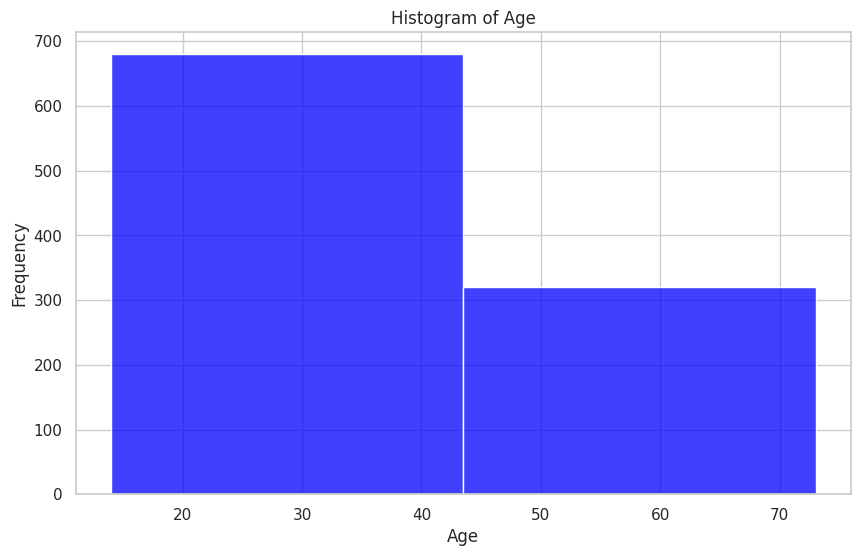

In [25]:
# Histogram for ALCOHOL CONSUMING
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=2, kde=False, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

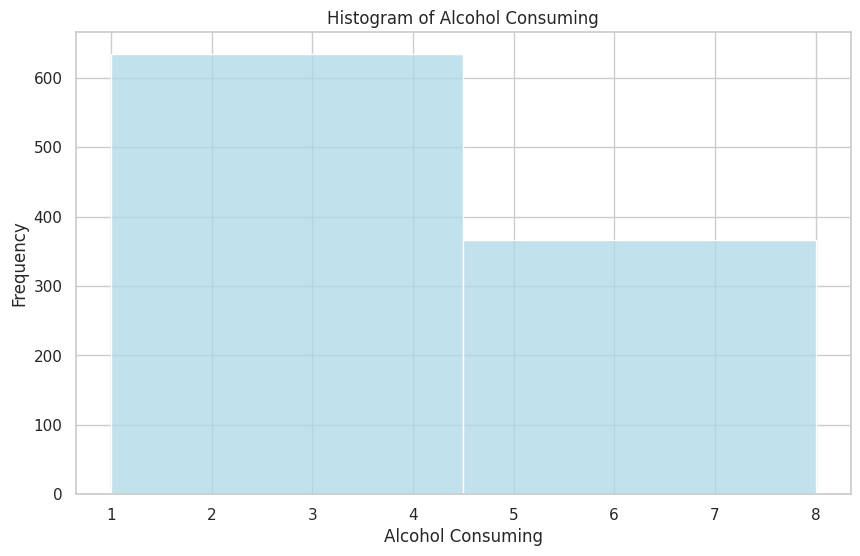

In [26]:
# Histogram for ALCOHOL CONSUMING
plt.figure(figsize=(10, 6))
sns.histplot(df['SMOKING'], bins=2, kde=False, color='lightblue')
plt.title('Histogram of Alcohol Consuming')
plt.xlabel('Alcohol Consuming')
plt.ylabel('Frequency')
plt.show()

# 3. EDA using Bar Plots:

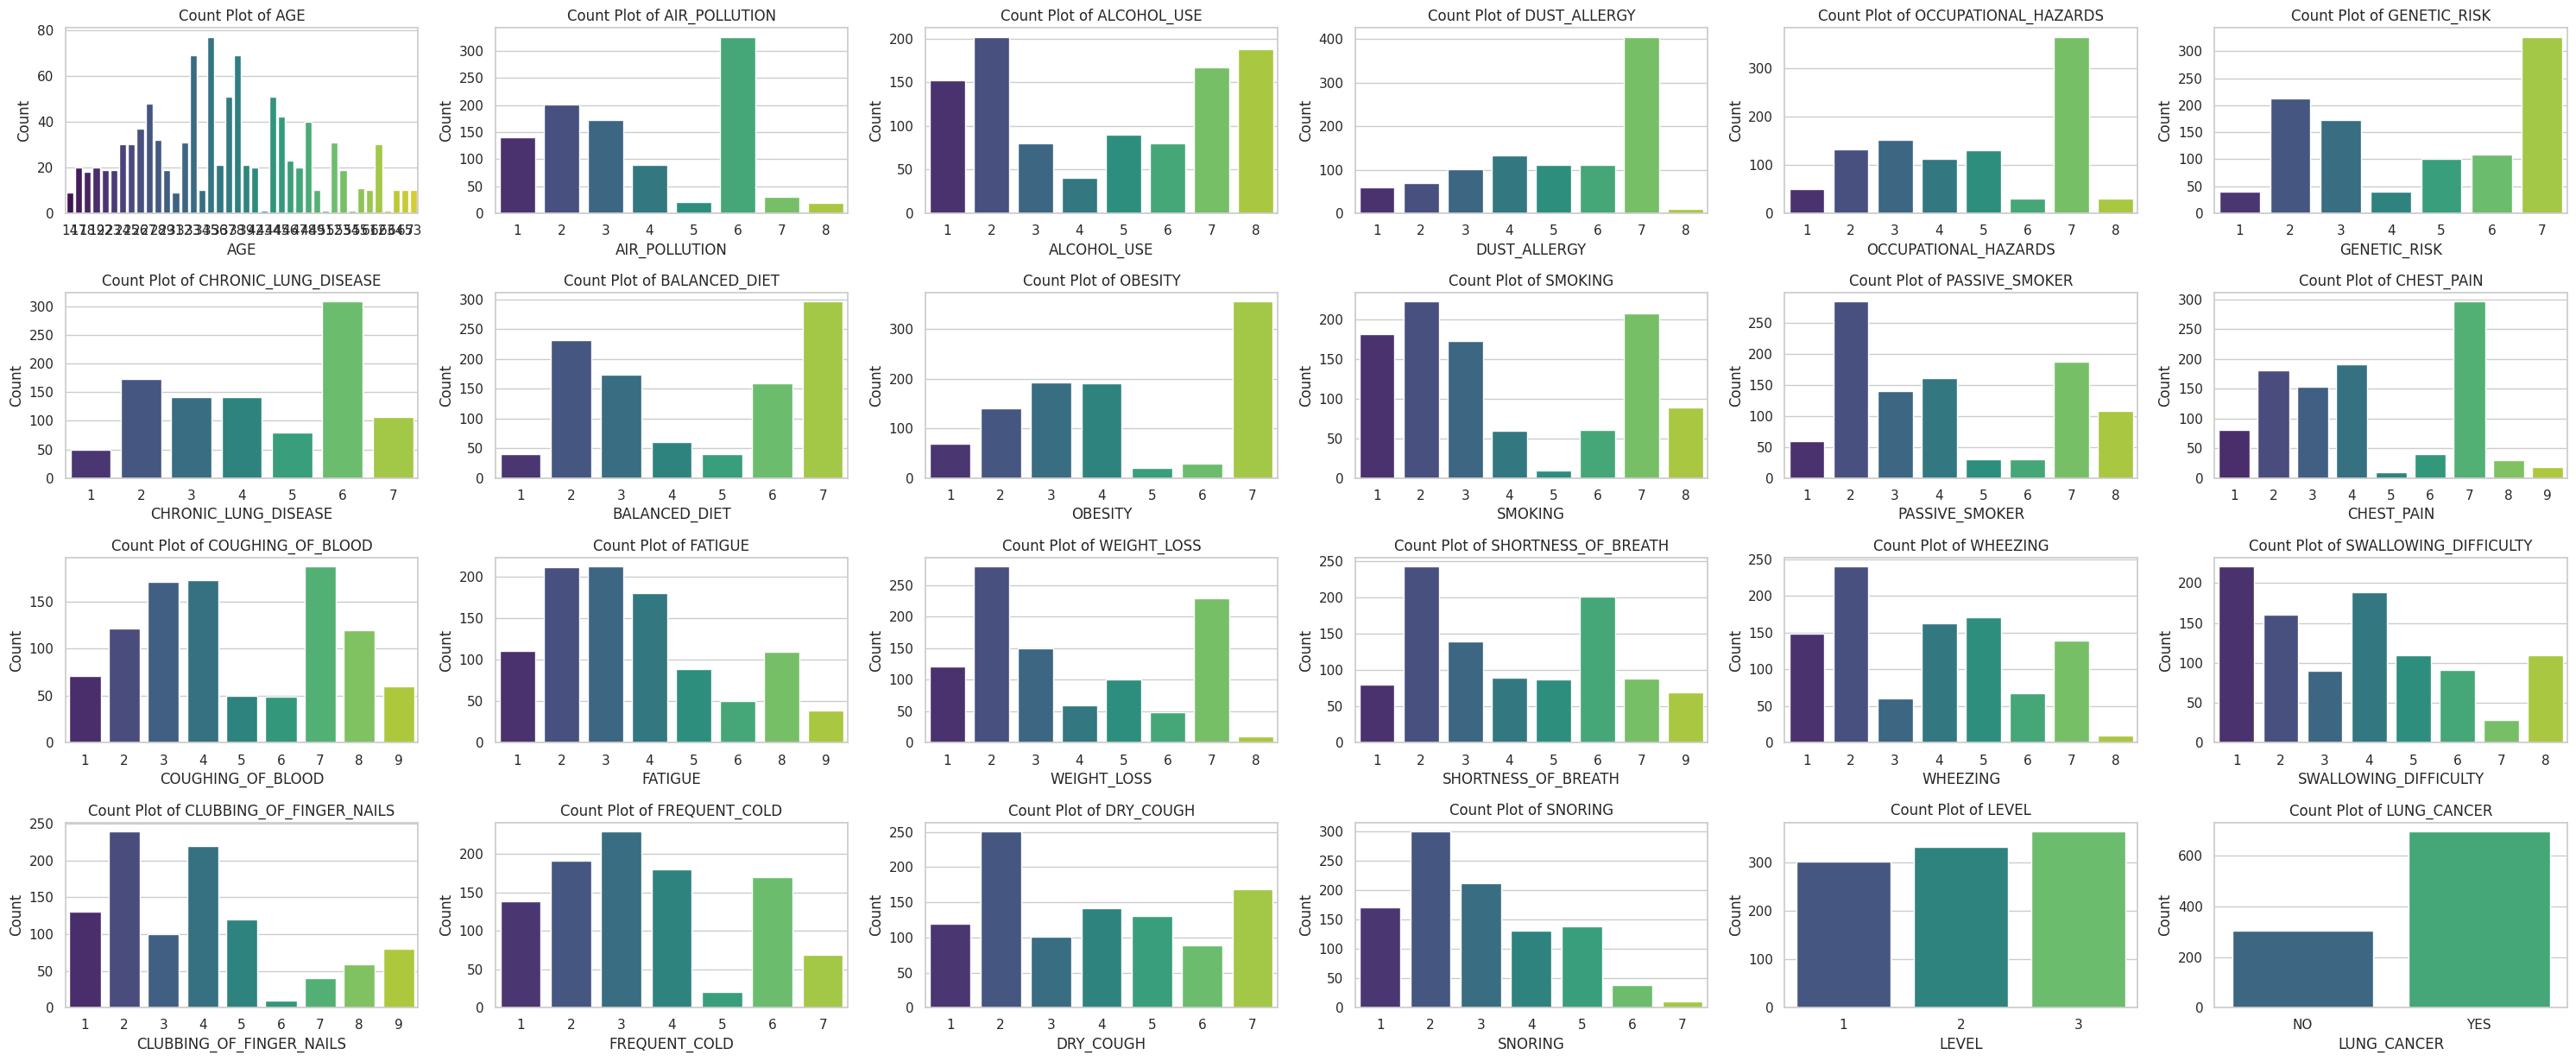

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Specify the columns for the consolidated count plot
selected_columns = ['AGE', 'AIR_POLLUTION', 'ALCOHOL_USE', 'DUST_ALLERGY', 'OCCUPATIONAL_HAZARDS',
                    'GENETIC_RISK', 'CHRONIC_LUNG_DISEASE', 'BALANCED_DIET', 'OBESITY', 'SMOKING',
                    'PASSIVE_SMOKER', 'CHEST_PAIN', 'COUGHING_OF_BLOOD', 'FATIGUE', 'WEIGHT_LOSS',
                    'SHORTNESS_OF_BREATH', 'WHEEZING', 'SWALLOWING_DIFFICULTY', 'CLUBBING_OF_FINGER_NAILS',
                    'FREQUENT_COLD', 'DRY_COUGH', 'SNORING', 'LEVEL', 'LUNG_CANCER']

# Create subplots for each column
plt.figure(figsize=(30, 15))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(5, 6, i)
    sns.countplot(x=df[column], palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

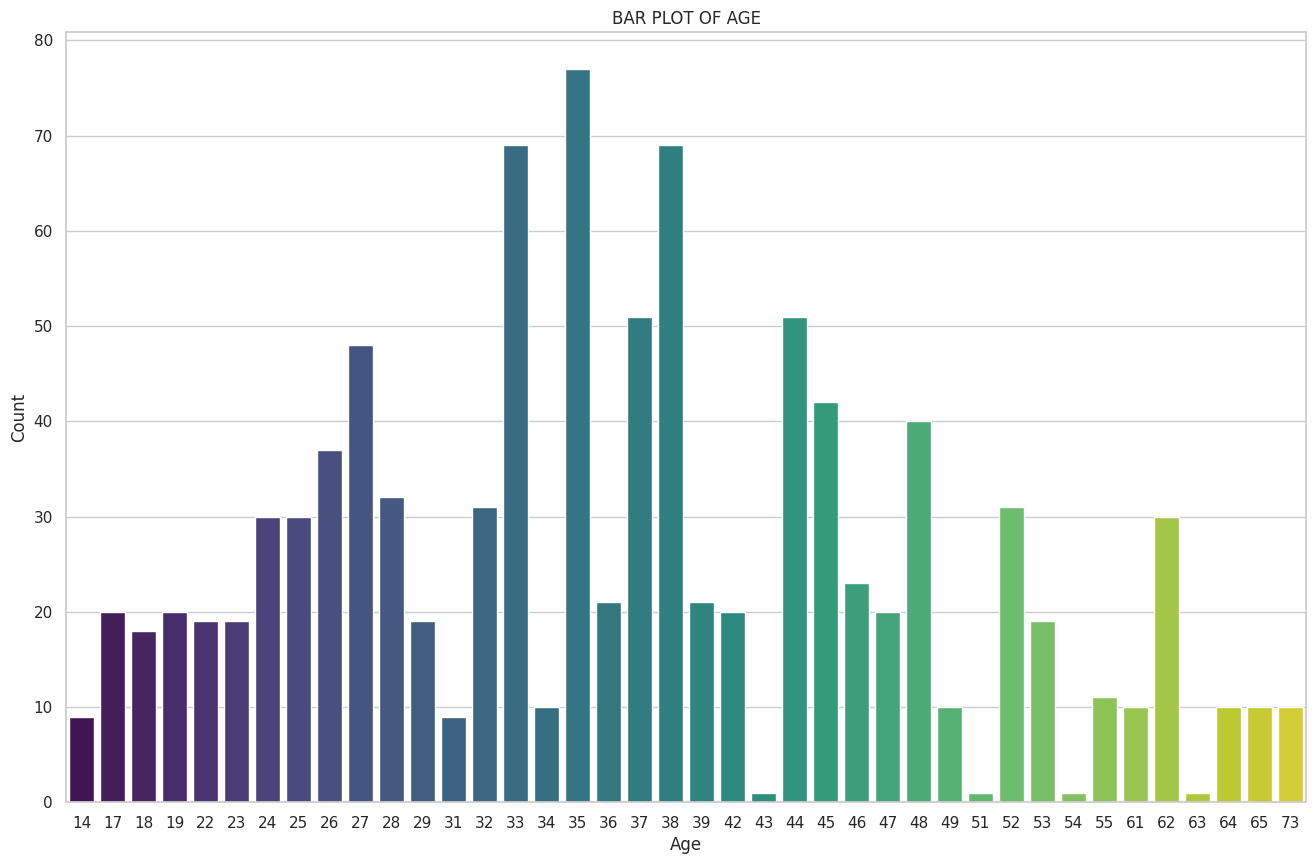

In [13]:
# Bar plot for AGE
plt.figure(figsize=(16, 10))
sns.countplot(x='AGE', data=df, palette='viridis')
plt.title('BAR PLOT OF AGE')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

---

# PART 1) CORRELATION ANALYSIS AND FEATURE IMPORTANCE:

## This section inclues the code to implement a correlation matrix and feature importance analysis using a RandomForestClassifier to identify significant features for predicting lung cancer. Adjustments can be made based on the specific requirements and data characteristics.

#*Feature importance analysis using a Random Forest Classifier:*

This code includes the steps for feature importance analysis using a Random Forest Classifier, including selecting a model, training the model, calculating feature importance, and visualizing the results.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Load the CSV data
df = pd.read_csv('/content/lung-repository/cancer patient data (D0).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   INDEX PATIENT_ID   RACE  AGE  GENDER  AIR_POLLUTION  ALCOHOL_USE  \
0      1         P1  Asian   33       1              2            4   
1      2         P2  Asian   17       1              3            1   
2      3         P3  Asian   35       1              4            5   
3      4         P4  Asian   37       1              7            7   
4      5         P5  Asian   46       1              6            8   

   DUST_ALLERGY  OCCUPATIONAL_HAZARDS  GENETIC_RISK  ...  WEIGHT_LOSS  \
0             5                     4             3  ...            4   
1             5                     3             4  ...            3   
2             6                     5             5  ...            7   
3             7                     7             6  ...            2   
4             7                     7             7  ...            2   

   SHORTNESS_OF_BREATH  WHEEZING  SWALLOWING_DIFFICULTY  \
0                    2         2              

In [32]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
INDEX                       0
PATIENT_ID                  0
RACE                        0
AGE                         0
GENDER                      0
AIR_POLLUTION               0
ALCOHOL_USE                 0
DUST_ALLERGY                0
OCCUPATIONAL_HAZARDS        0
GENETIC_RISK                0
CHRONIC_LUNG_DISEASE        0
BALANCED_DIET               0
OBESITY                     0
SMOKING                     0
PASSIVE_SMOKER              0
CHEST_PAIN                  0
COUGHING_OF_BLOOD           0
FATIGUE                     0
WEIGHT_LOSS                 0
SHORTNESS_OF_BREATH         0
WHEEZING                    0
SWALLOWING_DIFFICULTY       0
CLUBBING_OF_FINGER_NAILS    0
FREQUENT_COLD               0
DRY_COUGH                   0
SNORING                     0
LEVEL                       0
LUNG_CANCER                 0
dtype: int64


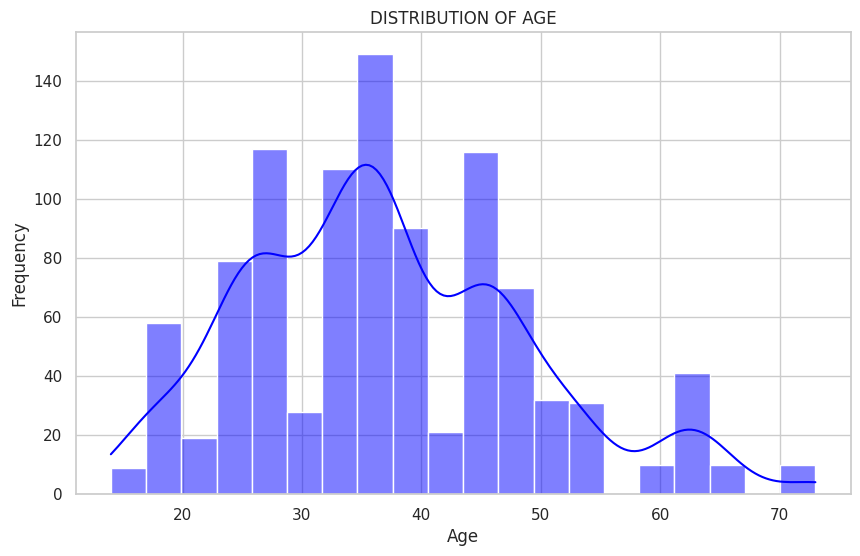

In [15]:
# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='blue')
plt.title('DISTRIBUTION OF AGE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

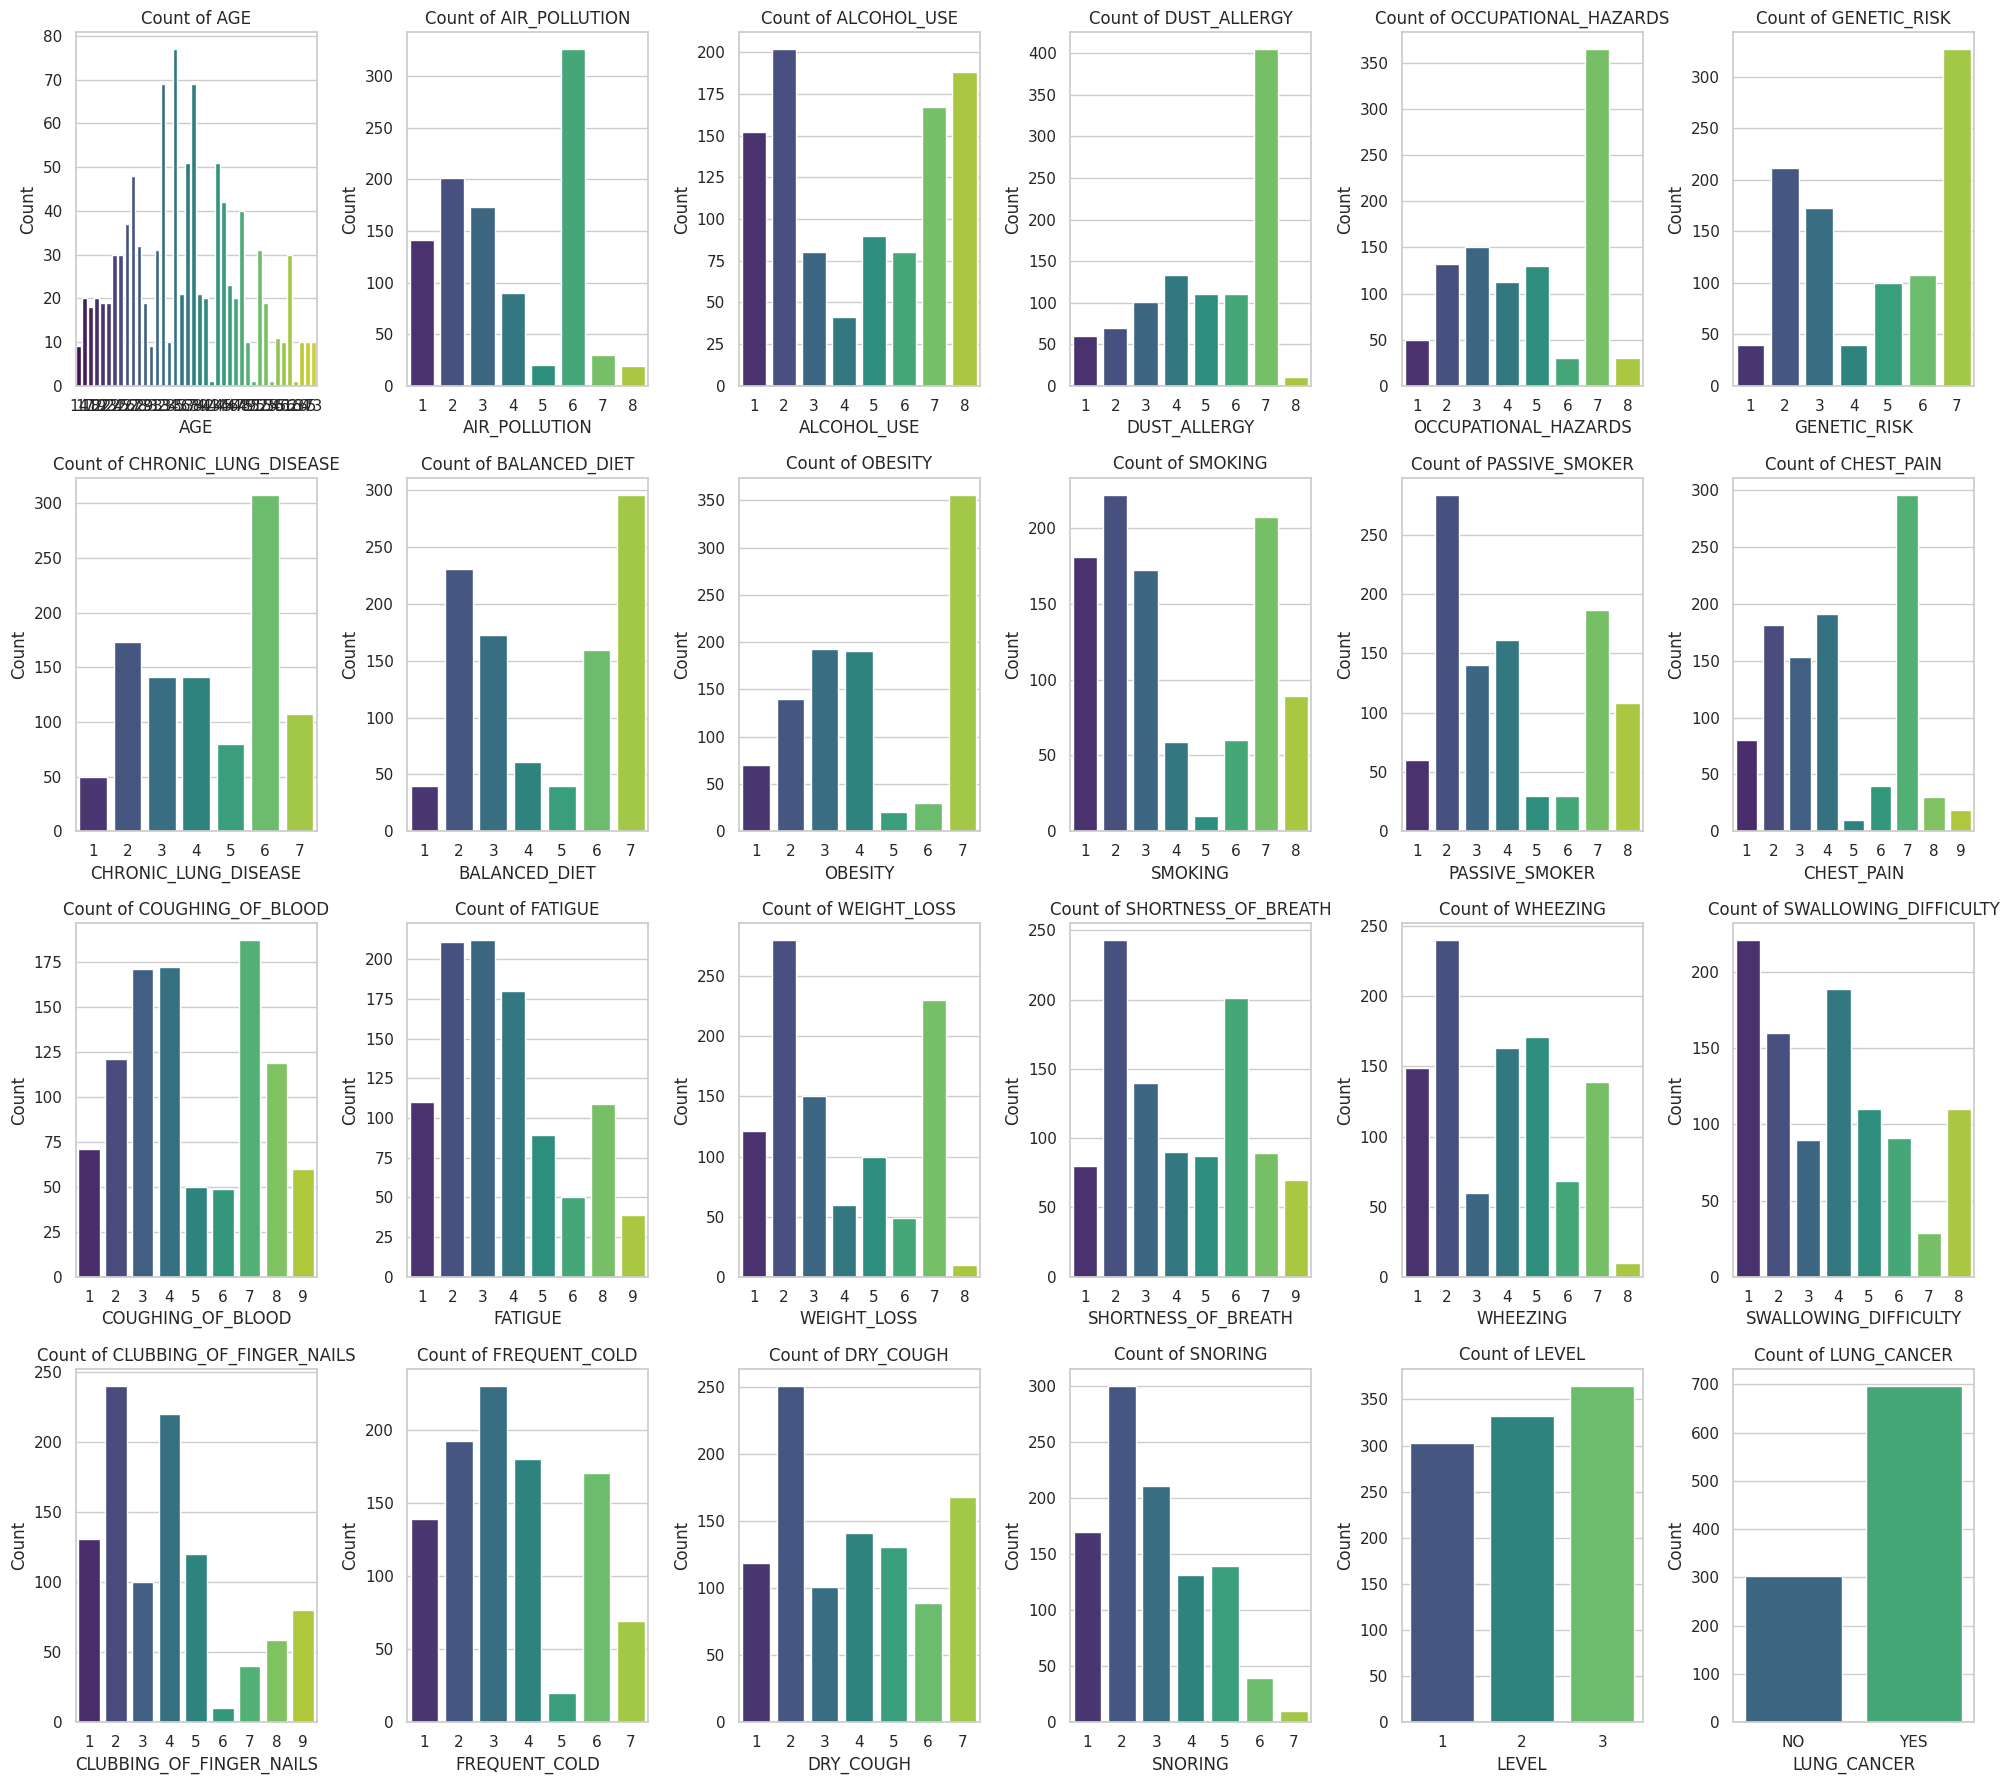

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Specify the columns for count plot
categorical_columns = ['AGE', 'AIR_POLLUTION', 'ALCOHOL_USE', 'DUST_ALLERGY', 'OCCUPATIONAL_HAZARDS',
                    'GENETIC_RISK', 'CHRONIC_LUNG_DISEASE', 'BALANCED_DIET', 'OBESITY', 'SMOKING',
                    'PASSIVE_SMOKER', 'CHEST_PAIN', 'COUGHING_OF_BLOOD', 'FATIGUE', 'WEIGHT_LOSS',
                    'SHORTNESS_OF_BREATH', 'WHEEZING', 'SWALLOWING_DIFFICULTY', 'CLUBBING_OF_FINGER_NAILS',
                    'FREQUENT_COLD', 'DRY_COUGH', 'SNORING', 'LEVEL', 'LUNG_CANCER']

# Determine the number of rows and columns needed for the subplot grid
num_columns = 6
num_rows = len(categorical_columns) // num_columns + (len(categorical_columns) % num_columns > 0)

# Create subplots for each column
plt.figure(figsize=(20, 18))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

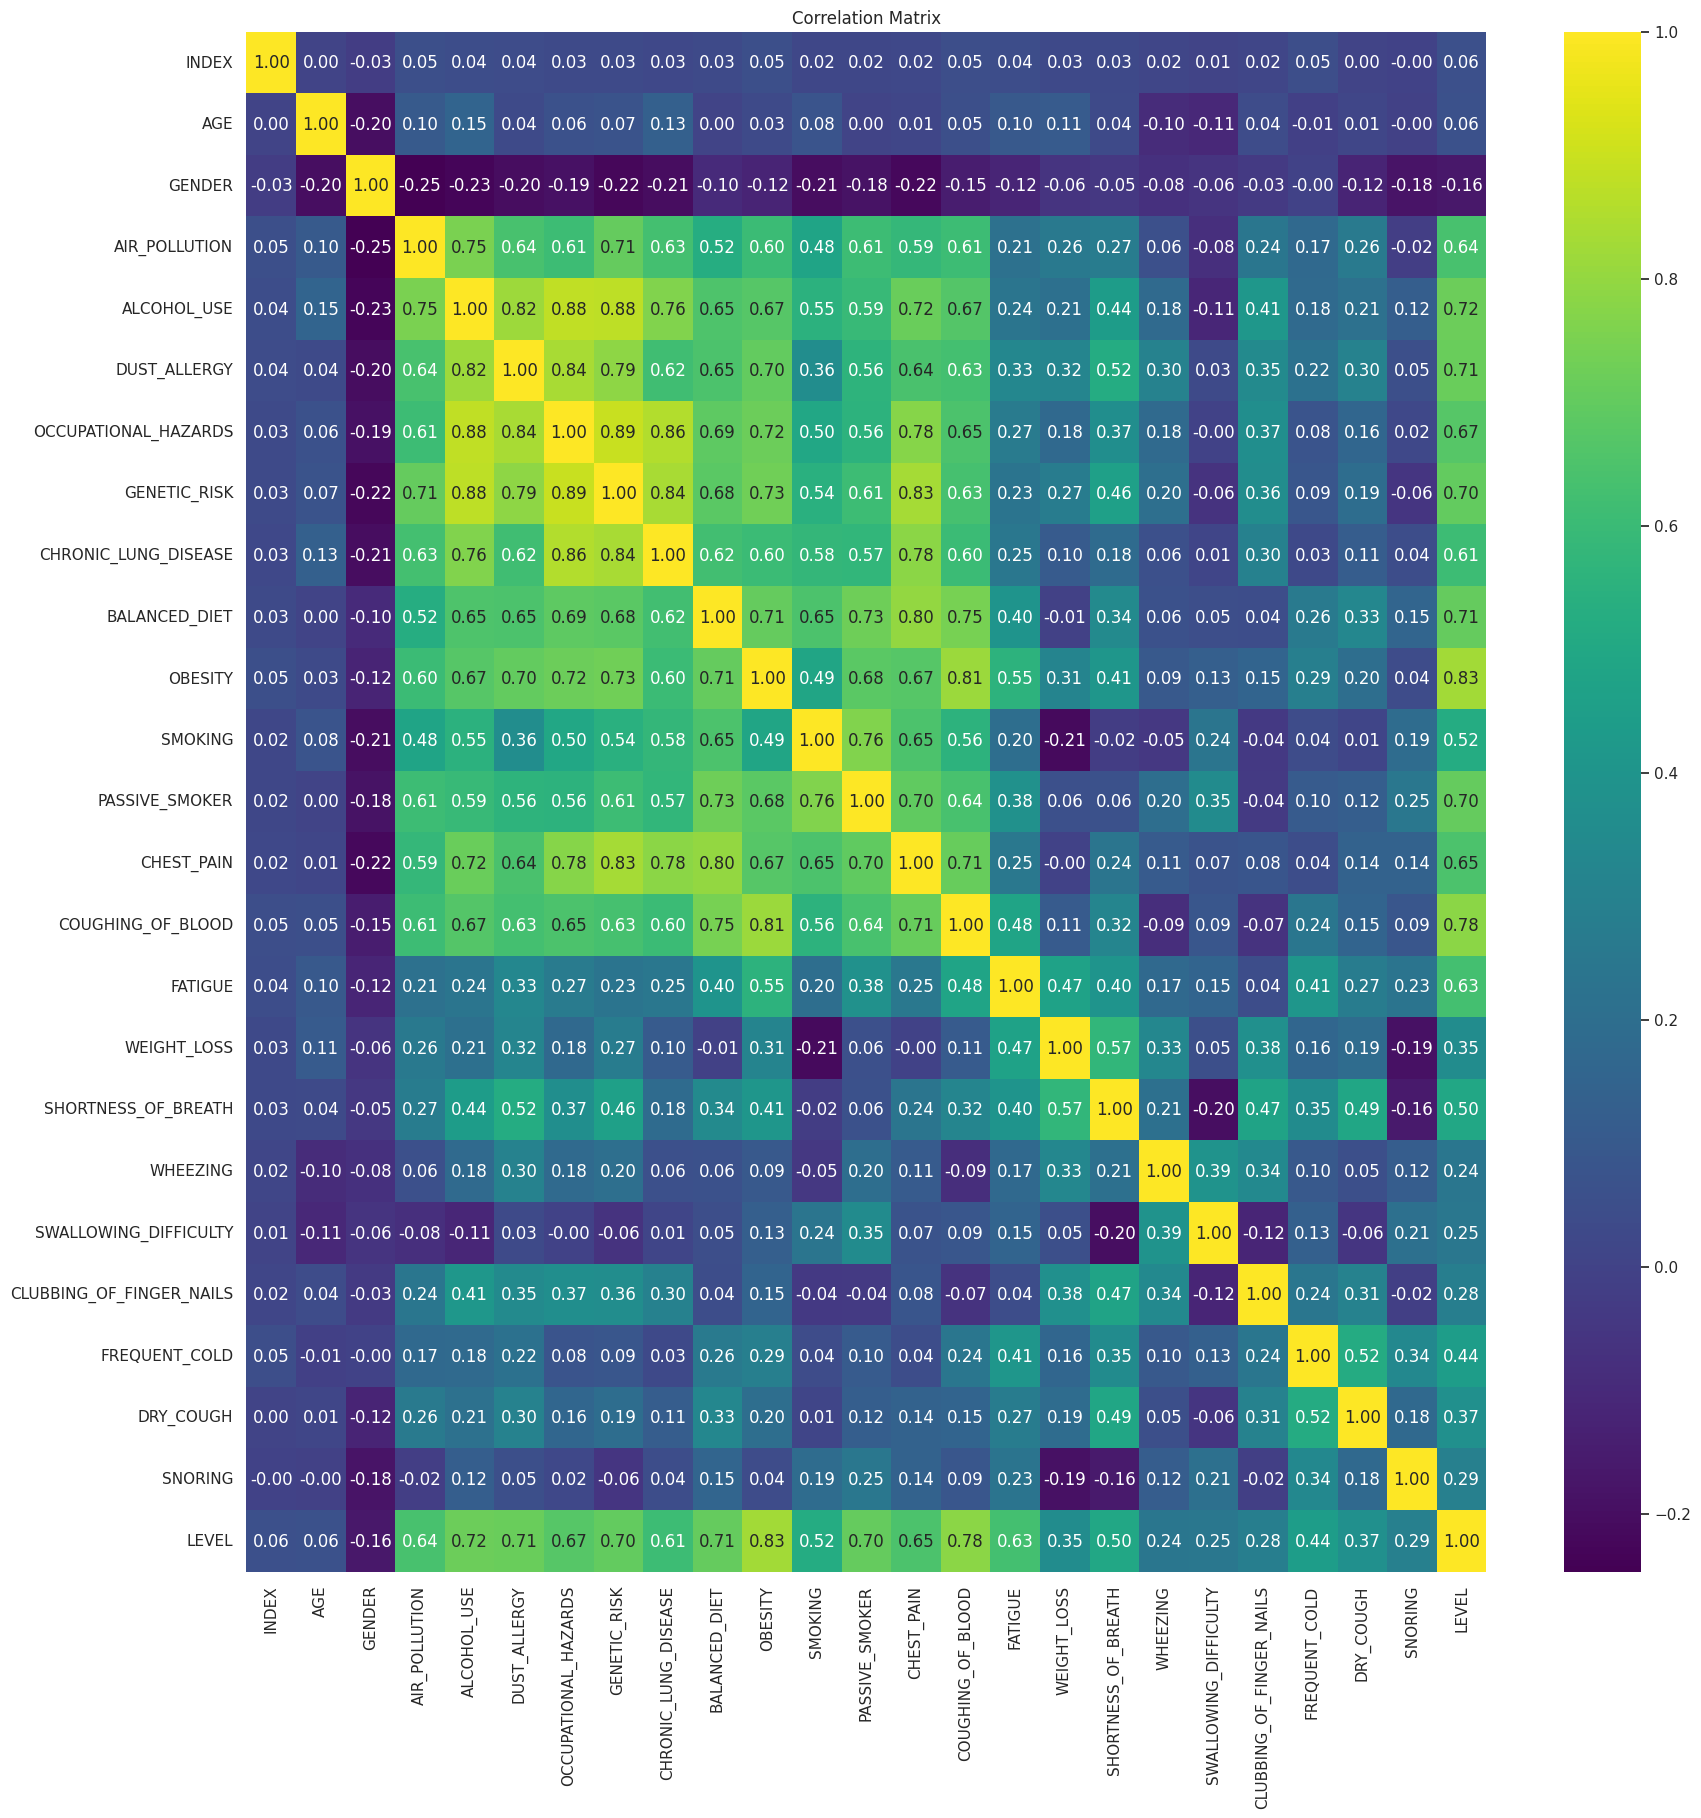

In [40]:
# Correlation Matrix
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Reset the warning filter to its default state (optional)
warnings.resetwarnings()

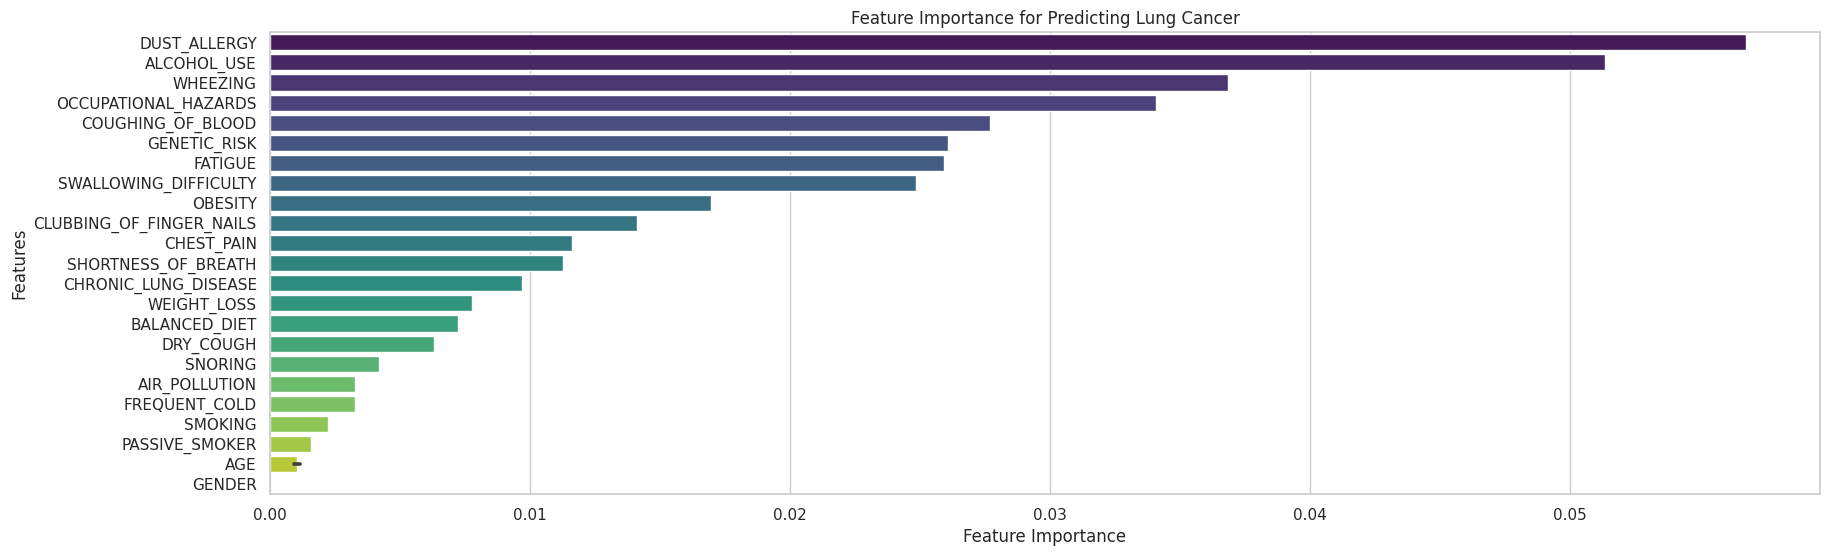

In [35]:
# Feature importance for predicting Lung Cancer
# Encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Display feature importance without top two features
top_features_to_exclude = 2
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False).iloc[top_features_to_exclude:]

# Visualize feature importance
plt.figure(figsize=(20, 6))
sns.barplot(x=feature_importance_sorted, y=feature_importance_sorted.index, palette='viridis')
plt.title(f'Feature Importance for Predicting Lung Cancer')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# PART 2) INTERPRETATION:

This section - Identify Top Influential Factors: Review the feature importance scores to determine the most influential factors contributing to lung cancer risk.

### ```Code  section to identify the top influential factors and interpret the feature importance scores.```

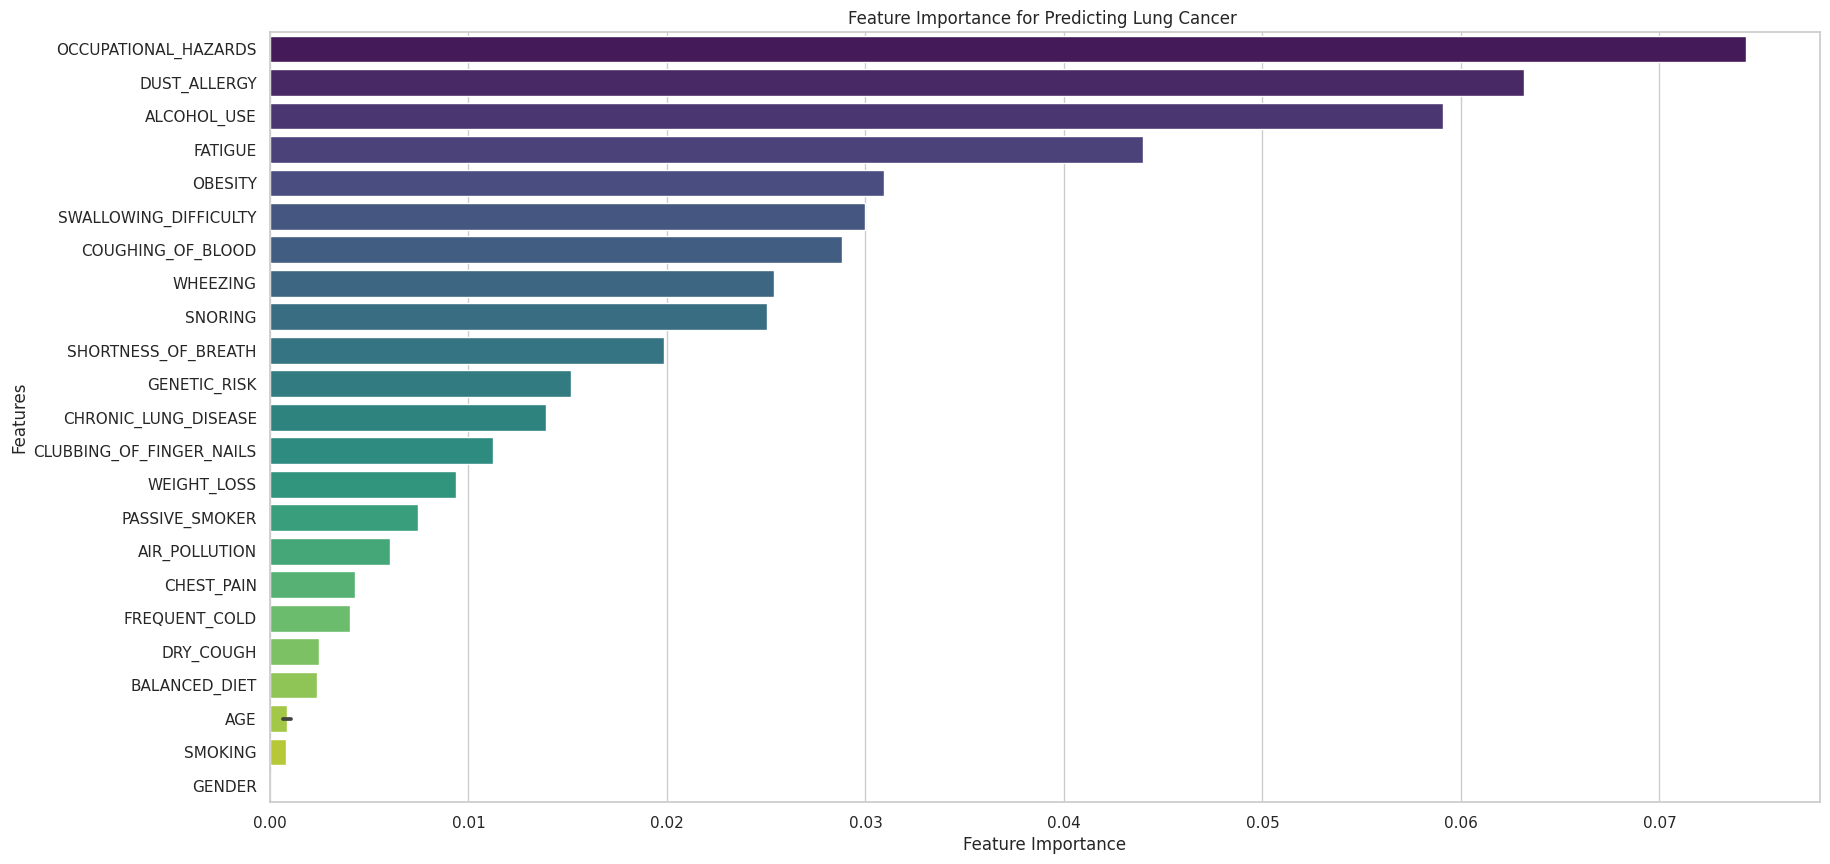

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the CSV data
df = pd.read_csv('/content/lung-repository/cancer patient data (D0).csv')


# Visualize the count of values in categorical columns
categorical_columns = ['AGE','GENDER','AIR_POLLUTION','ALCOHOL_USE','DUST_ALLERGY','OCCUPATIONAL_HAZARDS','GENETIC_RISK','CHRONIC_LUNG_DISEASE','BALANCED_DIET','OBESITY','SMOKING','PASSIVE_SMOKER','CHEST_PAIN','COUGHING_OF_BLOOD','FATIGUE','WEIGHT_LOSS','SHORTNESS_OF_BREATH','WHEEZING','SWALLOWING_DIFFICULTY','CLUBBING_OF_FINGER_NAILS','FREQUENT_COLD','DRY_COUGH','SNORING','LEVEL','LUNG_CANCER']


# Correlation Matrix
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Correlation matrix
correlation_matrix = df.corr()

# Reset the warning filter to its default state (optional)
warnings.resetwarnings()

# Feature importance for predicting Lung Cancer
# Encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)


# Further Analysis: Explore correlations between influential factors and lung cancer risk
# Selecting factors from 2nd to 7th for further analysis
start_factor = 2  # Specify the starting rank for selection
end_factor = 7    # Specify the ending rank for selection
selected_factors = feature_importance[start_factor - 1:end_factor].index.tolist()


# Display feature importance without top two features
top_features_to_exclude = 2
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False).iloc[top_features_to_exclude:]

# Visualize feature importance
plt.figure(figsize=(20, 10))
sns.barplot(x=feature_importance_sorted, y=feature_importance_sorted.index, palette='viridis')
plt.title(f'Feature Importance for Predicting Lung Cancer ')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


---

# DISPLAY - TOP INFLUENTIAL FACTORS

In [28]:
!pip install tabulate

In [33]:
import pandas as pd
from tabulate import tabulate

# Assuming top_influential_factors is a pandas Series
top_influential_factors_data = top_influential_factors.reset_index()
top_influential_factors_data.columns = ['Influential Factors ', 'Factor Values']

# Skip the top record (assuming you want to skip the first row)
skip_top_record = 1
table_format_grid = tabulate(top_influential_factors_data.iloc[skip_top_record:], headers='keys', tablefmt='grid', showindex=False)

print(":::::::::::::::::::::::::::")
print("::TOP INFLUENTIAL FACTORS::")
print(":::::::::::::::::::::::::::")
print(table_format_grid)

:::::::::::::::::::::::::::
::TOP INFLUENTIAL FACTORS::
:::::::::::::::::::::::::::
+------------------------+-----------------+
| Influential Factors    |   Factor Values |
+========================+=================+
| DUST_ALLERGY           |       0.0535049 |
+------------------------+-----------------+
| ALCOHOL_USE            |       0.050388  |
+------------------------+-----------------+
| OCCUPATIONAL_HAZARDS   |       0.047134  |
+------------------------+-----------------+
| FATIGUE                |       0.041248  |
+------------------------+-----------------+
| SWALLOWING_DIFFICULTY  |       0.0335081 |
+------------------------+-----------------+
| GENETIC_RISK           |       0.0304155 |
+------------------------+-----------------+


In [34]:
print(top_influential_factors)

LUNG_CANCER_YES          0.261058
DUST_ALLERGY             0.053505
ALCOHOL_USE              0.050388
OCCUPATIONAL_HAZARDS     0.047134
FATIGUE                  0.041248
SWALLOWING_DIFFICULTY    0.033508
GENETIC_RISK             0.030416
dtype: float64


---

# PART 3a) RANDOM FOREST CLASSIFIER - MODEL VALIDATION :

### Validating the RandomForestClassifier model:

To add the new feature "Validating the RandomForestClassifier model to ensure reliability and accuracy," you can evaluate the model on the testing set and display relevant performance metrics. Here's the enhanced code:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Load the CSV data
df = pd.read_csv('/content/lung-repository/cancer patient data (D0).csv')

# # Display the first 5 rows of the dataframe
# print("First 5 rows of the dataset:")
# print(df.head())

# # Display basic information about the dataset
# print("\nDataset Information:")
# print(df.info())

# # Summary statistics for numerical columns
# print("\nSummary Statistics:")
# print(df.describe())

# # Check for missing values
# print("\nMissing Values:")
# print(df.isnull().sum())

# # Visualize the distribution of numerical columns
# plt.figure(figsize=(10, 6))
# sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
# plt.title('Distribution of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['AGE', 'GENDER', 'AIR_POLLUTION', 'ALCOHOL_USE', 'DUST_ALLERGY', 'OCCUPATIONAL_HAZARDS', 'GENETIC_RISK', 'CHRONIC_LUNG_DISEASE', 'BALANCED_DIET', 'OBESITY', 'SMOKING', 'PASSIVE_SMOKER', 'CHEST_PAIN', 'COUGHING_OF_BLOOD', 'FATIGUE', 'WEIGHT_LOSS', 'SHORTNESS_OF_BREATH', 'WHEEZING', 'SWALLOWING_DIFFICULTY', 'CLUBBING_OF_FINGER_NAILS', 'FREQUENT_COLD', 'DRY_COUGH', 'SNORING', 'LEVEL', 'LUNG_CANCER']

# # Adjust the number of rows to accommodate all categorical columns
# num_rows = (len(categorical_columns) // 4) + 1
# plt.figure(figsize=(15, 4 * num_rows))
# for i, column in enumerate(categorical_columns, 1):
#     plt.subplot(num_rows, 4, i)
#     sns.countplot(x=column, data=df, palette='viridis')
#     plt.title(f'Count of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')

# plt.tight_layout()
# plt.show()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Validate the RandomForestClassifier model on the testing set
y_pred = rf_model.predict(X_test)

# Display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Validation - Accuracy: {accuracy:.4f}")

# Display classification report using tabulate with 'grid' table format
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_tabulated = tabulate(class_report_df, headers='keys', tablefmt='grid', showindex=True)
print("\nClassification Report:")
print(class_report_tabulated)

# Display confusion matrix using tabulate with 'grid' table format
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted NO', 'Predicted YES'], index=['Actual NO', 'Actual YES'])
conf_matrix_tabulated = tabulate(conf_matrix_df, headers='keys', tablefmt='grid', showindex=True)
print("\nConfusion Matrix:")
print(conf_matrix_tabulated)



Model Validation - Accuracy: 1.0000

Classification Report:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
+==============+=============+==========+============+===========+
| NO           |           1 |        1 |          1 |        55 |
+--------------+-------------+----------+------------+-----------+
| YES          |           1 |        1 |          1 |       145 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |           1 |        1 |          1 |         1 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |           1 |        1 |          1 |       200 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |           1 |        1 |          1 |       200 |
+--------------+-------------+----------+------------+-----------+

Confusion Matrix:
+------------+----------------+-----------------+

# PART 3b) SELECTED FACTORS :: PAIR PLOT :


Model Validation - Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00        55
         YES       1.00      1.00      1.00       145

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



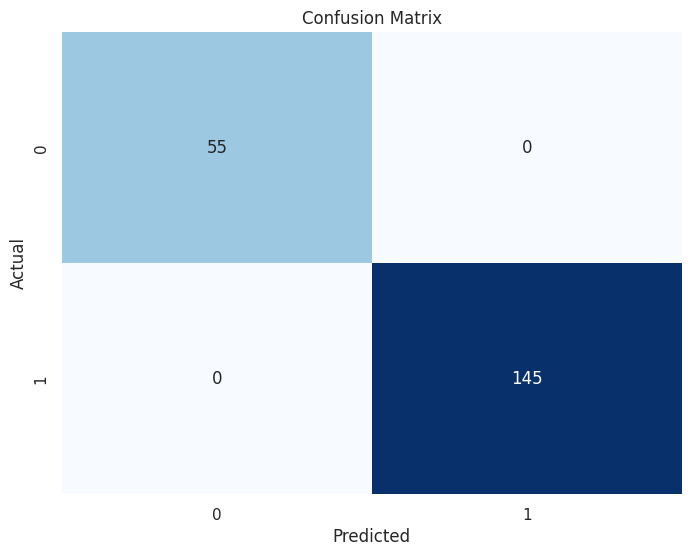

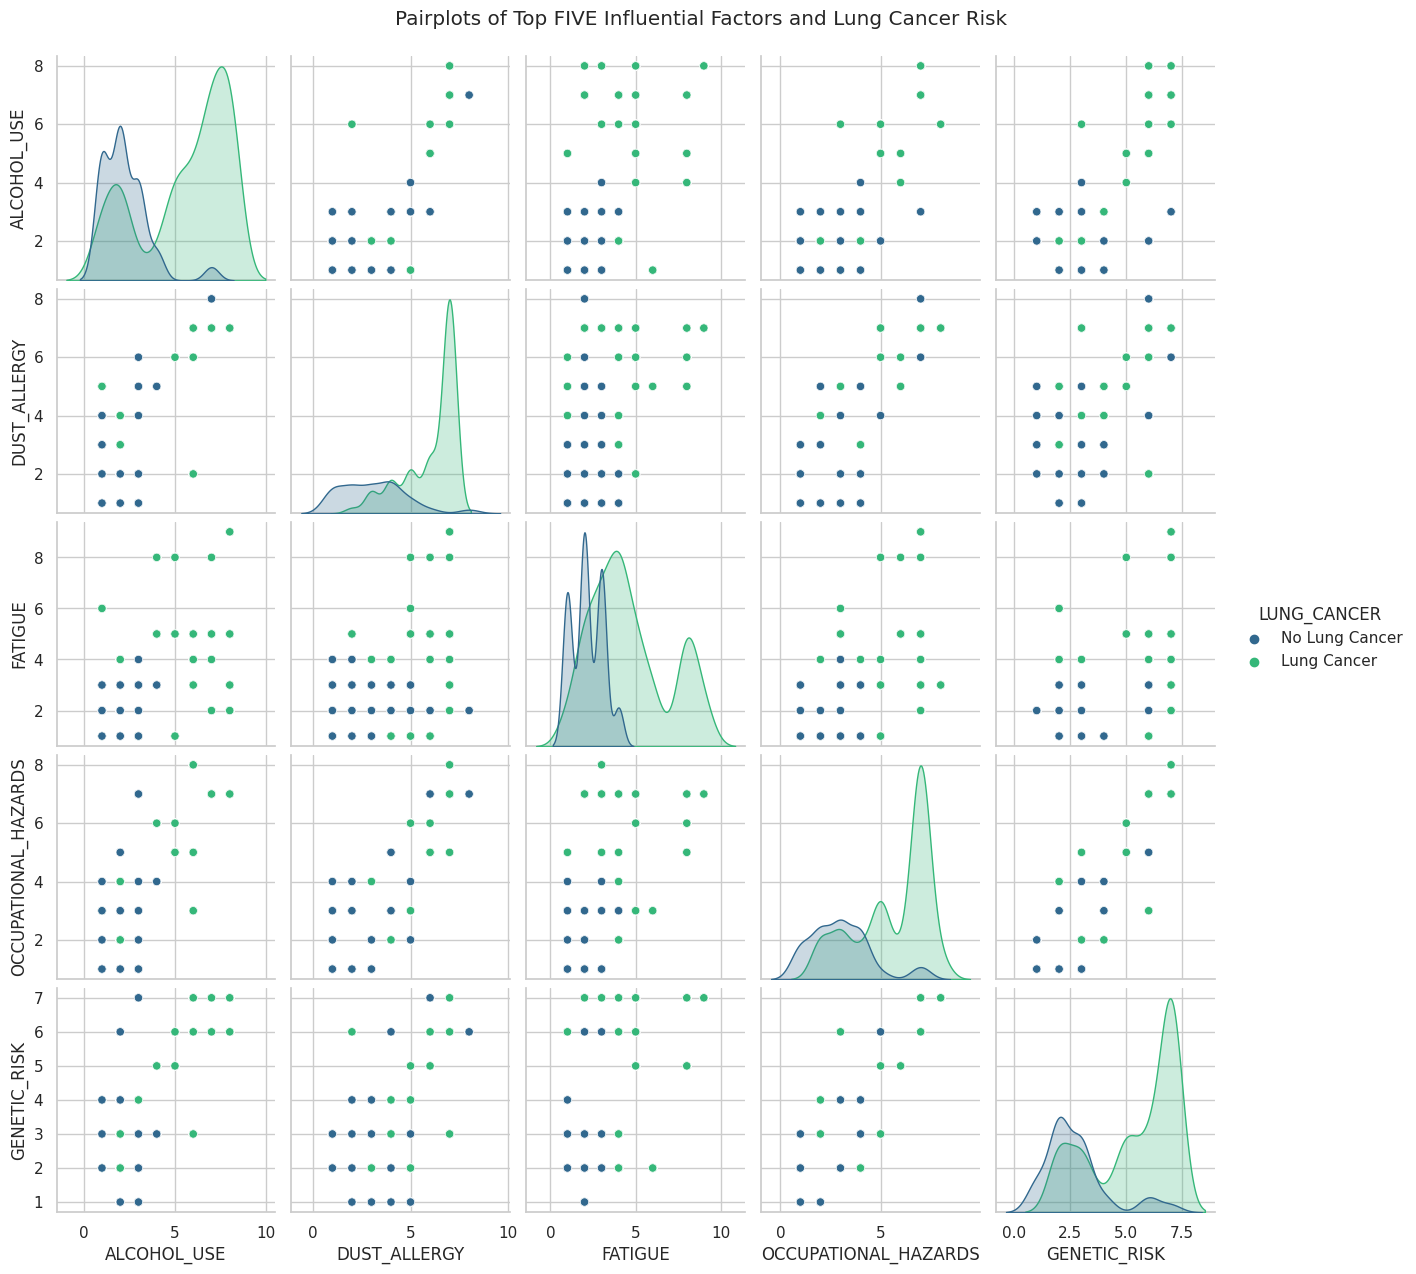

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV data
df = pd.read_csv('/content/lung-repository/cancer patient data (D0).csv')

# Visualize the count of values in categorical columns
categorical_columns = ['AGE','GENDER','AIR_POLLUTION','ALCOHOL_USE','DUST_ALLERGY','OCCUPATIONAL_HAZARDS','GENETIC_RISK','CHRONIC_LUNG_DISEASE','BALANCED_DIET','OBESITY','SMOKING','PASSIVE_SMOKER','CHEST_PAIN','COUGHING_OF_BLOOD','FATIGUE','WEIGHT_LOSS','SHORTNESS_OF_BREATH','WHEEZING','SWALLOWING_DIFFICULTY','CLUBBING_OF_FINGER_NAILS','FREQUENT_COLD','DRY_COUGH','SNORING','LUNG_CANCER']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Validate the RandomForestClassifier model on the testing set
y_pred = rf_model.predict(X_test)

# Display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Validation - Accuracy: {accuracy:.4f}")

# Display classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Further Analysis: Explore correlations between influential factors and lung cancer risk
# Selecting factors from 2nd to 7th for further analysis
start_factor = 2  # Specify the starting rank for selection
end_factor = 7    # Specify the ending rank for selection
selected_factors = feature_importance[start_factor - 1:end_factor].index.tolist()

# Values to be removed from selected_factors
values_to_remove = ['LUNG_CANCER_YES']

# Remove specific values from selected factors list
selected_factors = [factor for factor in selected_factors if factor not in values_to_remove]

# Add 'LUNG_CANCER' to the selected factors list separately
selected_factors_with_target = selected_factors + ['LUNG_CANCER']

# Plot pair plots to explore correlations between influential factors and lung cancer risk
pairplot_df = df[selected_factors_with_target].copy()

# Update column names for better visualization
column_mapping = {
    'YES': 'Lung Cancer',
    'NO': 'No Lung Cancer'
}
pairplot_df['LUNG_CANCER'] = pairplot_df['LUNG_CANCER'].map(column_mapping)

# Remove 'LEVEL' column from the selected factors using .loc
if 'LEVEL' in pairplot_df.columns:
    pairplot_df = pairplot_df.drop('LEVEL', axis=1)

sns.pairplot(pairplot_df, hue='LUNG_CANCER', palette='viridis')
plt.suptitle('Pairplots of Top FIVE Influential Factors and Lung Cancer Risk', y=1.02)
plt.show()

---

# ENHANCEMENTS :
# ```ENHANCEMENTS 1:Handle Categorical Columns with Many Unique Values:```
If your categorical columns have many unique values, visualizing all of them in a count plot might be overwhelming. Consider filtering and plotting only the top N values to provide more meaningful insights.

# ```ENHANCEMENTS 2:Handle Outliers:```
Check for outliers in numerical columns and visualize them using box plots or violin plots. Outliers can significantly affect the mean and standard deviation, impacting the interpretation of your data.

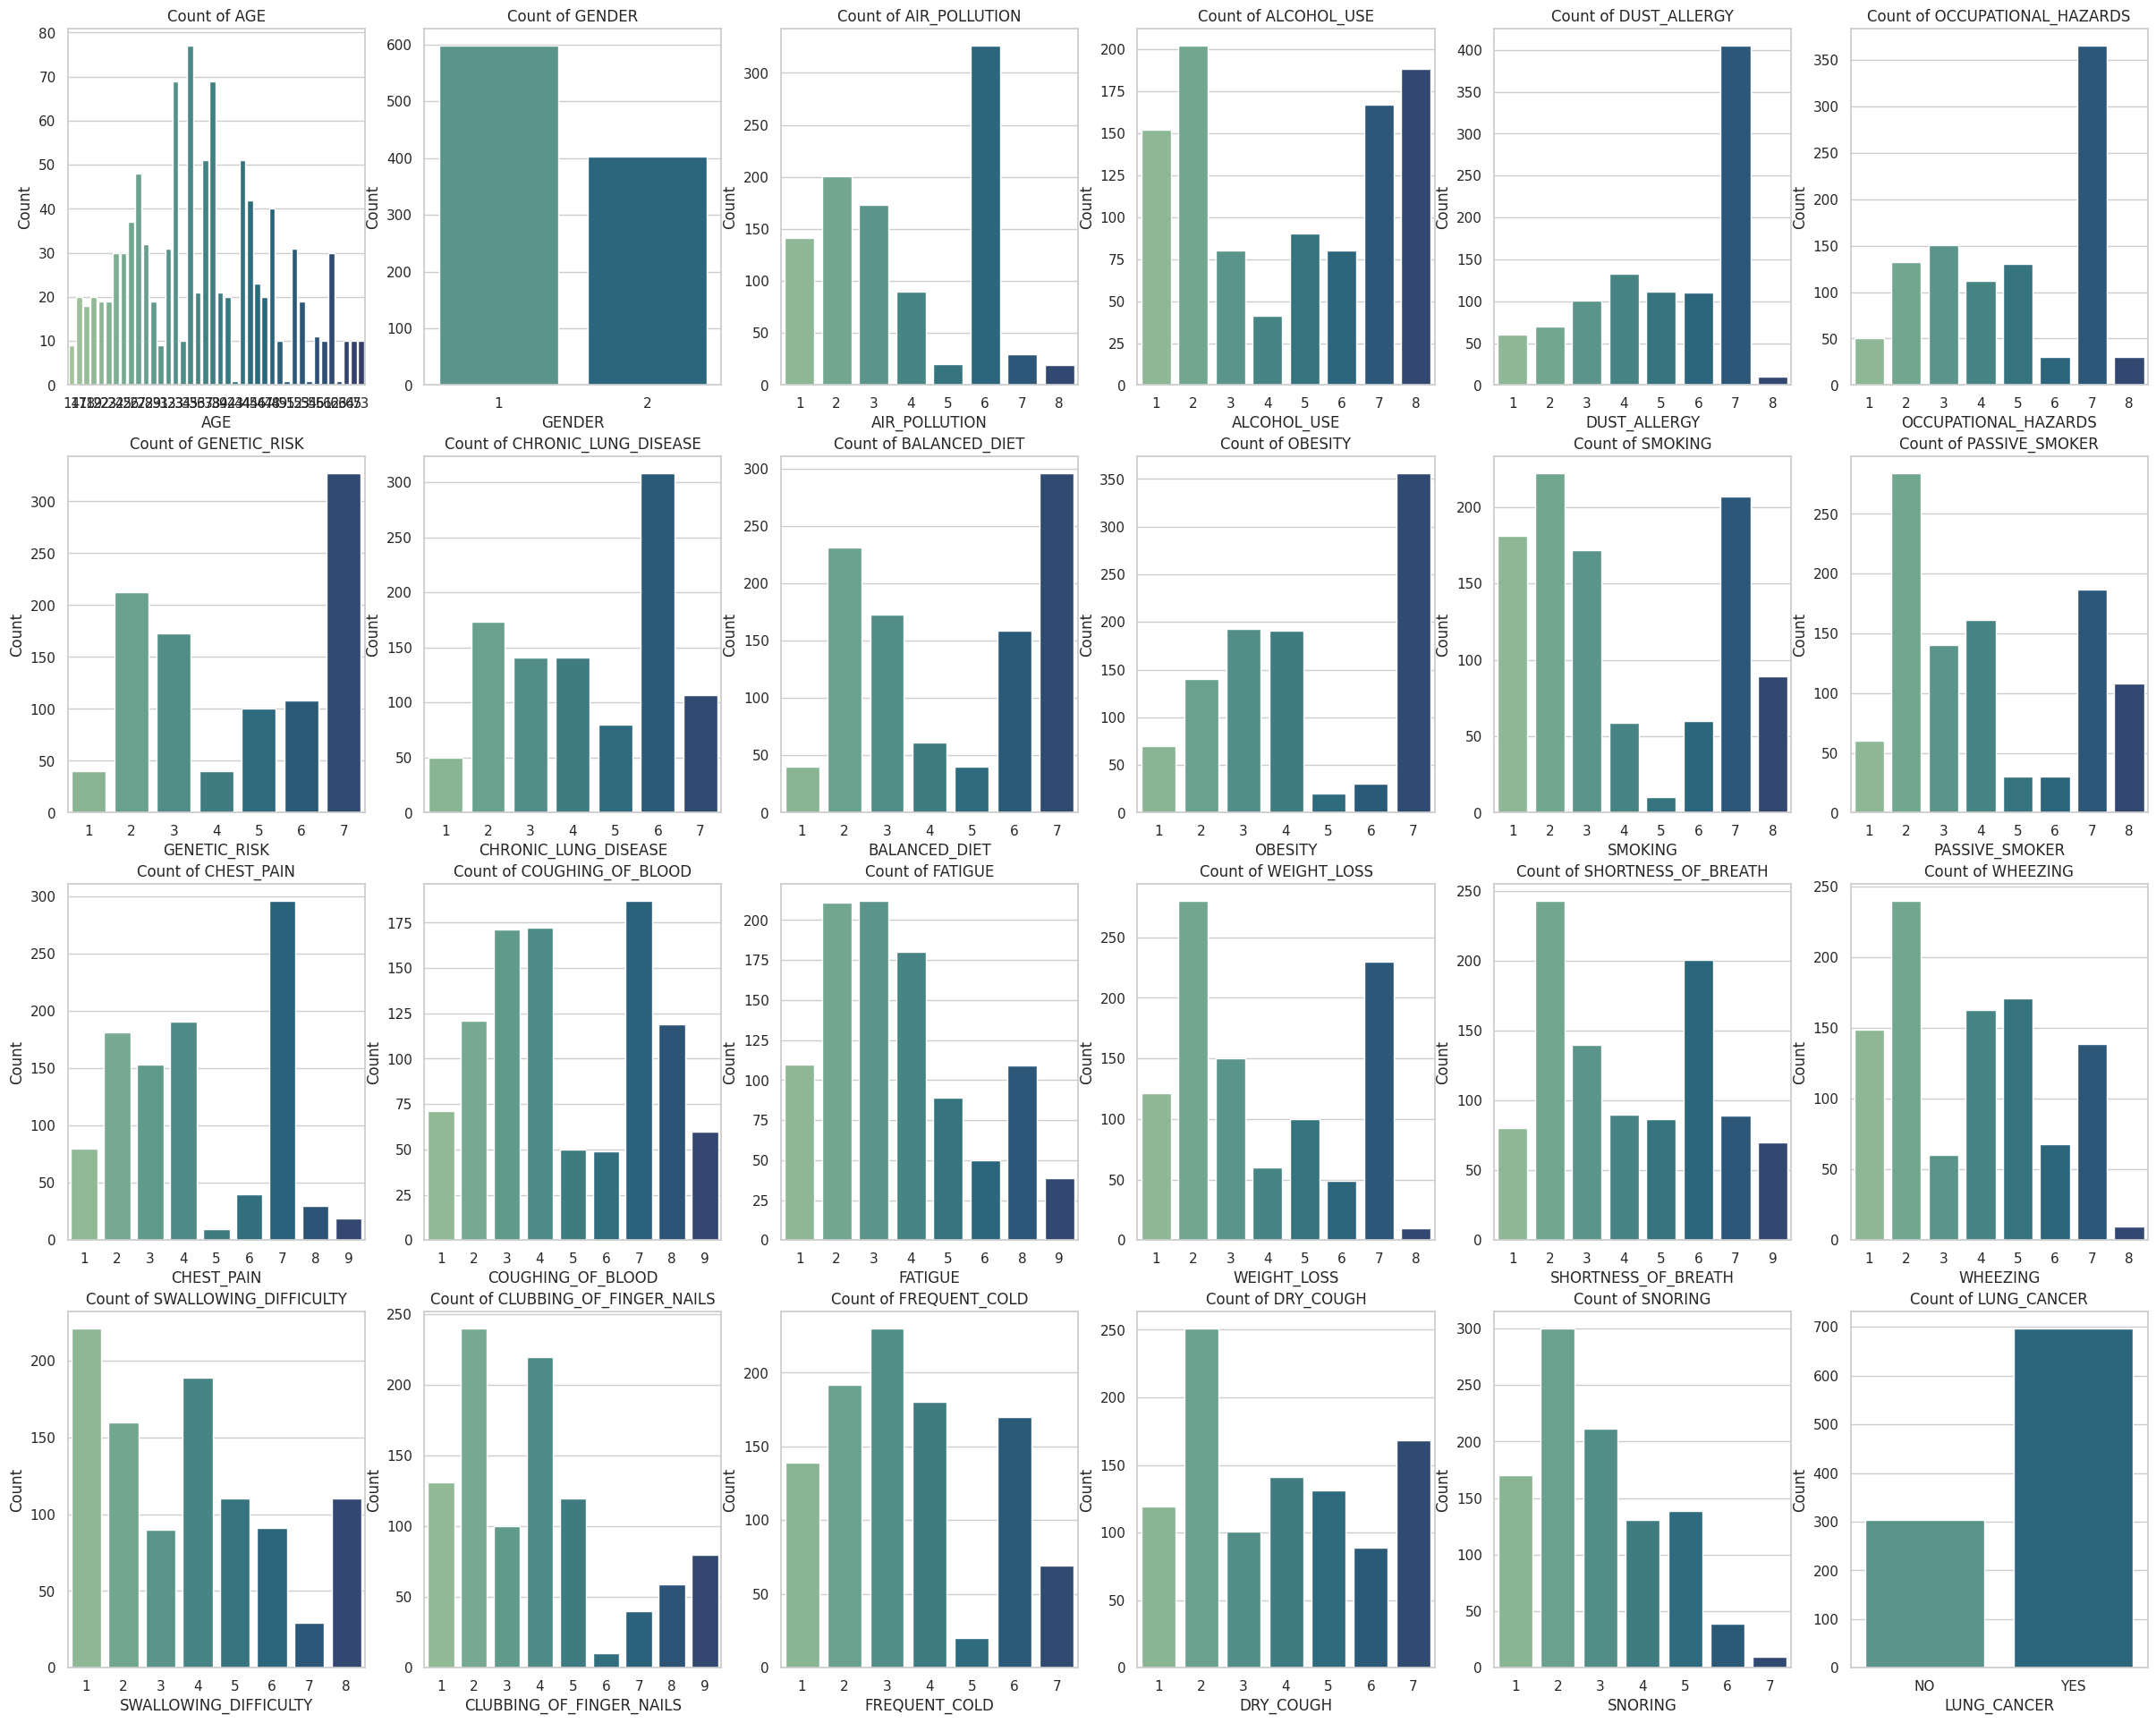

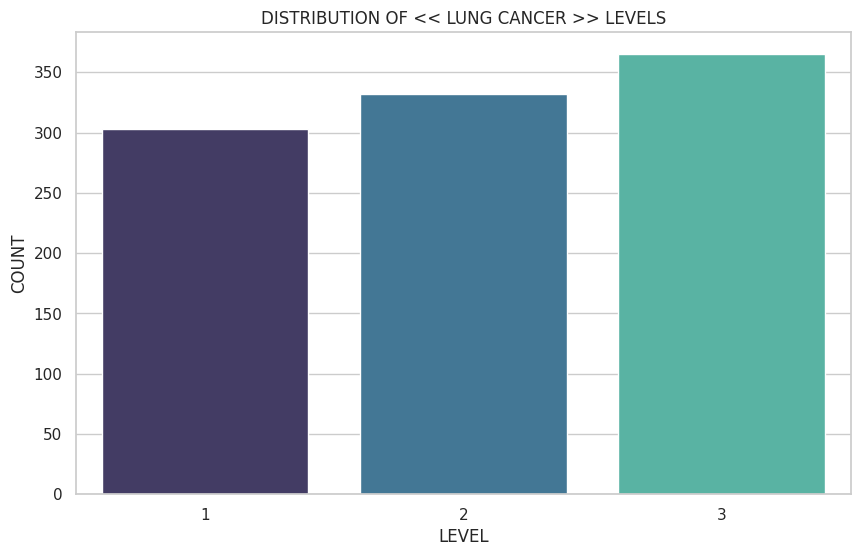

<Figure size 640x480 with 0 Axes>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
df = pd.read_csv('/content/lung-repository/cancer patient data (D0).csv')

# # Display the first 5 rows of the dataframe
# print("First 5 rows of the dataset:")
# print(df.head())

# # Display basic information about the dataset
# print("\nDataset Information:")
# print(df.info())

# # Summary statistics for numerical columns
# print("\nSummary Statistics:")
# print(df.describe())

# # Check for missing values
# print("\nMissing Values:")
# print(df.isnull().sum())

# # Visualize the distribution of numerical columns
# plt.figure(figsize=(10, 6))
# sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
# plt.title('Distribution of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['AGE','GENDER','AIR_POLLUTION','ALCOHOL_USE','DUST_ALLERGY','OCCUPATIONAL_HAZARDS','GENETIC_RISK','CHRONIC_LUNG_DISEASE','BALANCED_DIET','OBESITY','SMOKING','PASSIVE_SMOKER','CHEST_PAIN','COUGHING_OF_BLOOD','FATIGUE','WEIGHT_LOSS','SHORTNESS_OF_BREATH','WHEEZING','SWALLOWING_DIFFICULTY','CLUBBING_OF_FINGER_NAILS','FREQUENT_COLD','DRY_COUGH','SNORING','LUNG_CANCER']

plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 6, i)
    sns.countplot(x=column, data=df, palette='crest')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

# Visualize the distribution of the 'LEVEL' column
plt.figure(figsize=(10, 6))
sns.countplot(x='LEVEL', data=df, palette='mako')
plt.title('DISTRIBUTION OF << LUNG CANCER >> LEVELS')
plt.xlabel('LEVEL')
plt.ylabel('COUNT')
plt.show()

plt.tight_layout()
plt.show()


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Reset the warning filter to its default state (optional)
warnings.resetwarnings()

# Feature importance for predicting Lung Cancer
from sklearn.ensemble import RandomForestClassifier

# Encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
df = pd.read_csv('/content/lung-repository/survey lung cancer (D1).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                        'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Reset the warning filter to its default state (optional)
warnings.resetwarnings()

# Feature importance for predicting Lung Cancer
from sklearn.ensemble import RandomForestClassifier

# Encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)





# ```ENHANCEMENTS 1:```

# Handling Categorical Columns with Many Unique Values:

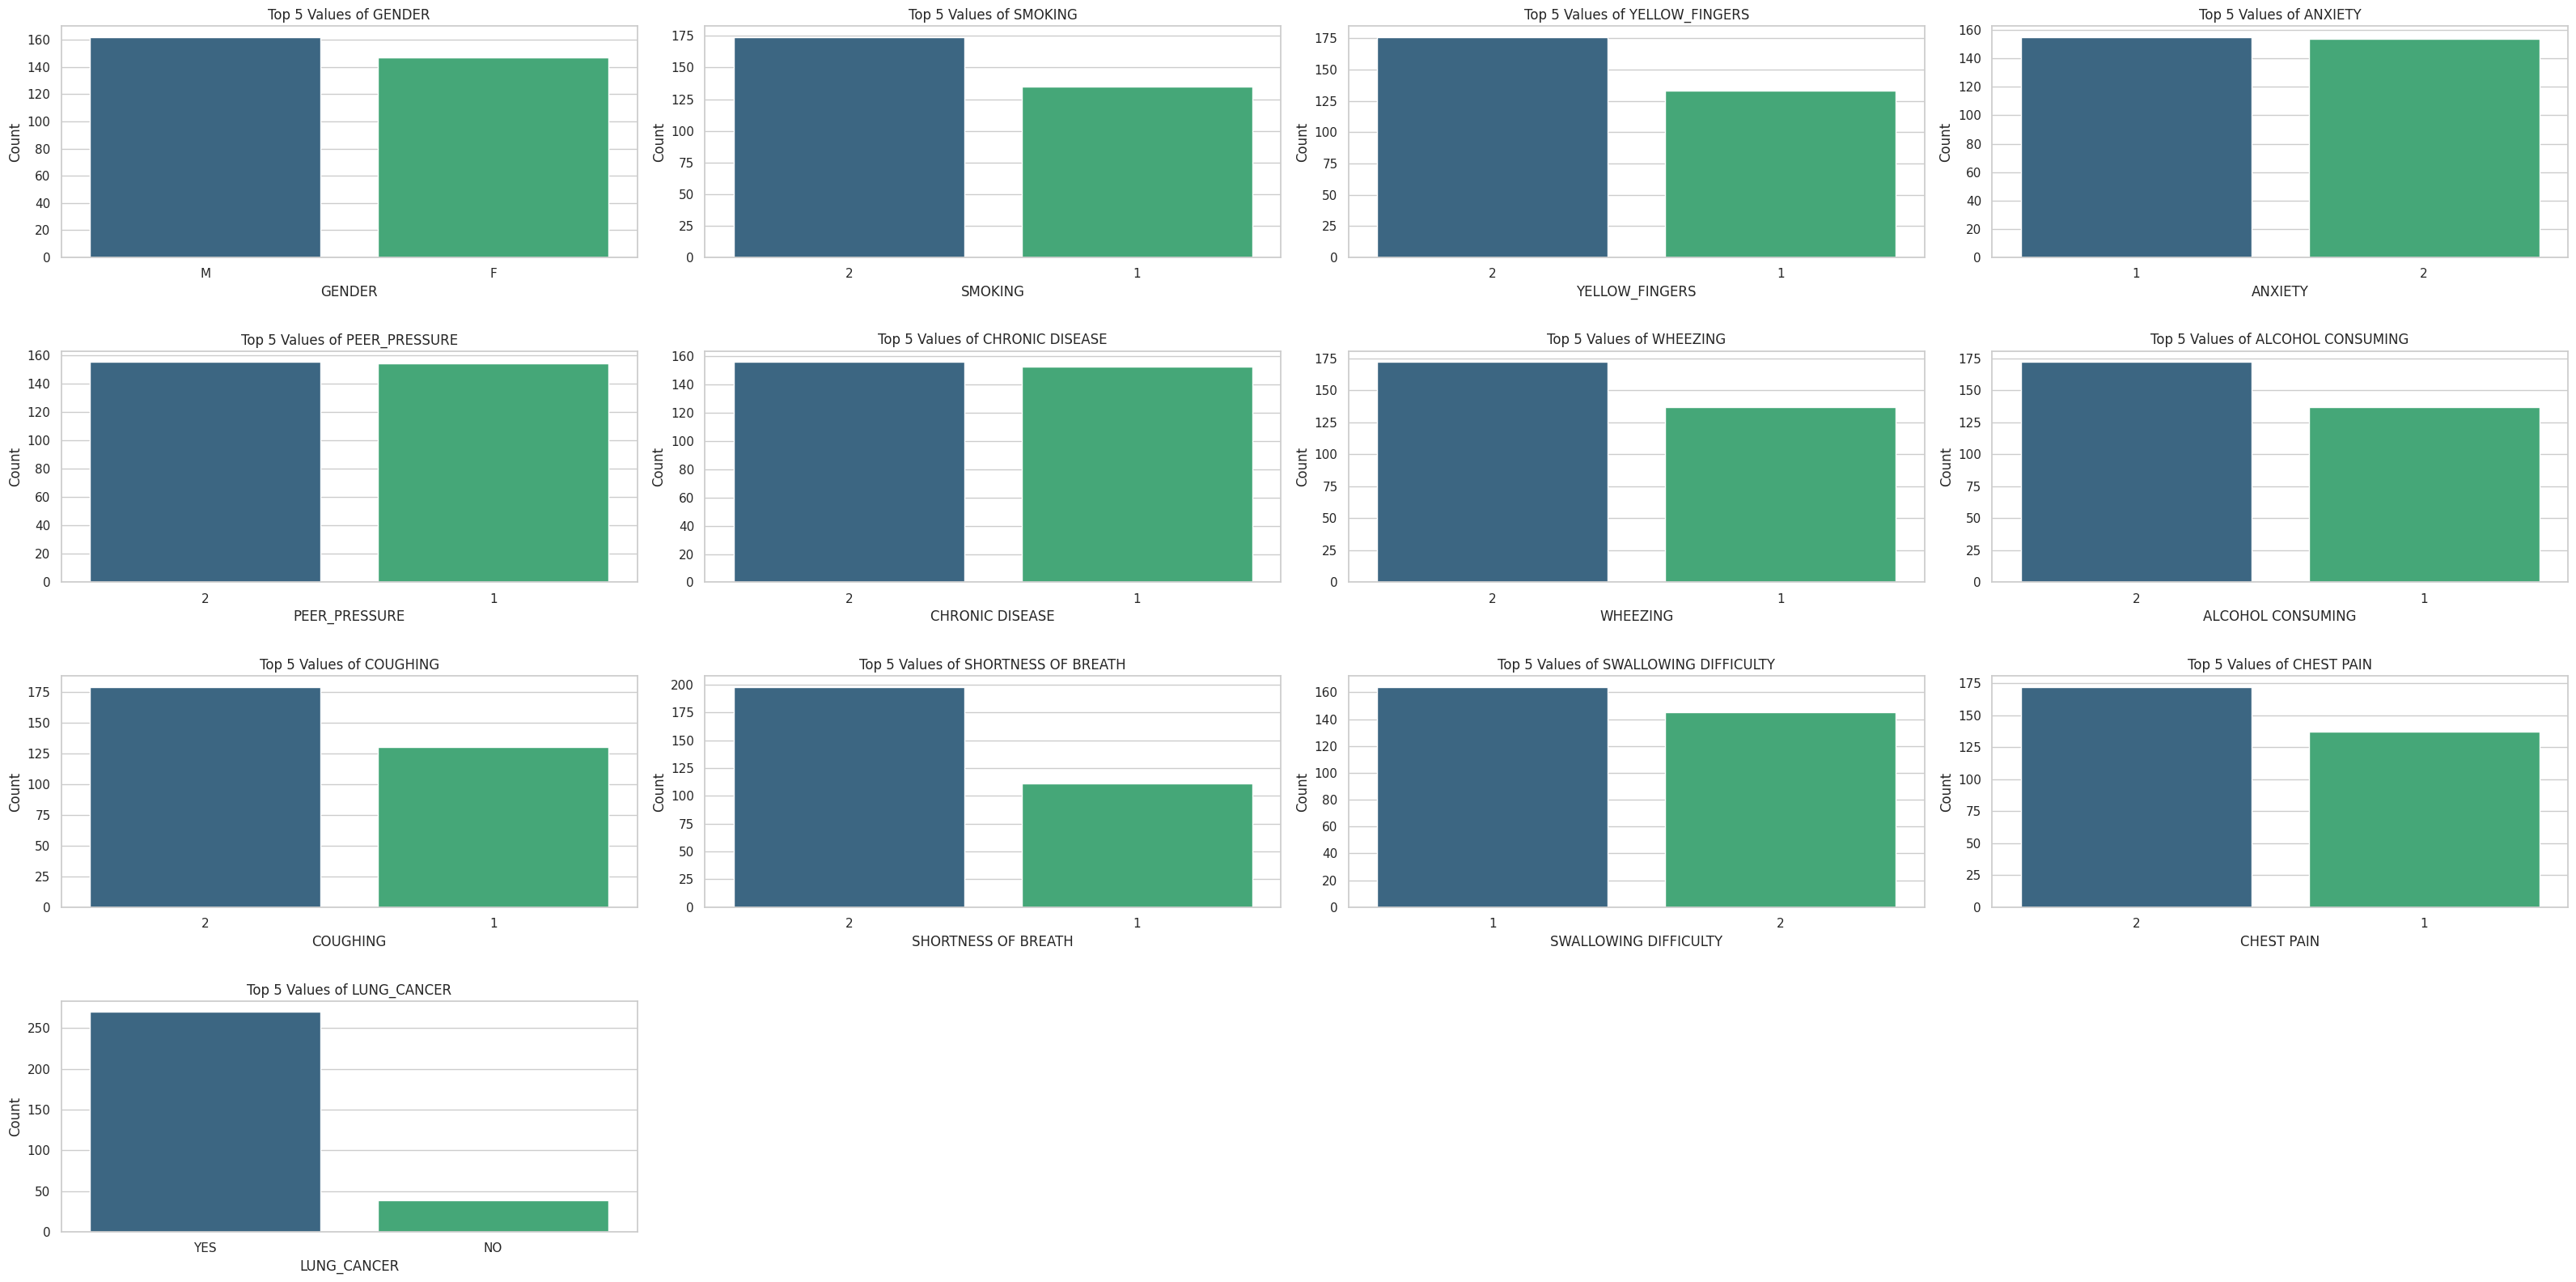

In [ ]:
# Handling Categorical Columns with Many Unique Values
top_n_values = 5
plt.figure(figsize=(32,16))  # Increase the figure size
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, order=df[column].value_counts().index[:top_n_values], palette='viridis')
    plt.title(f'Top {top_n_values} Values of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout(h_pad=2.5)  # Adjust the h_pad parameter for vertical spacing
plt.show()


# ```ENHANCEMENTS 2:```

# Improved  Visualization:

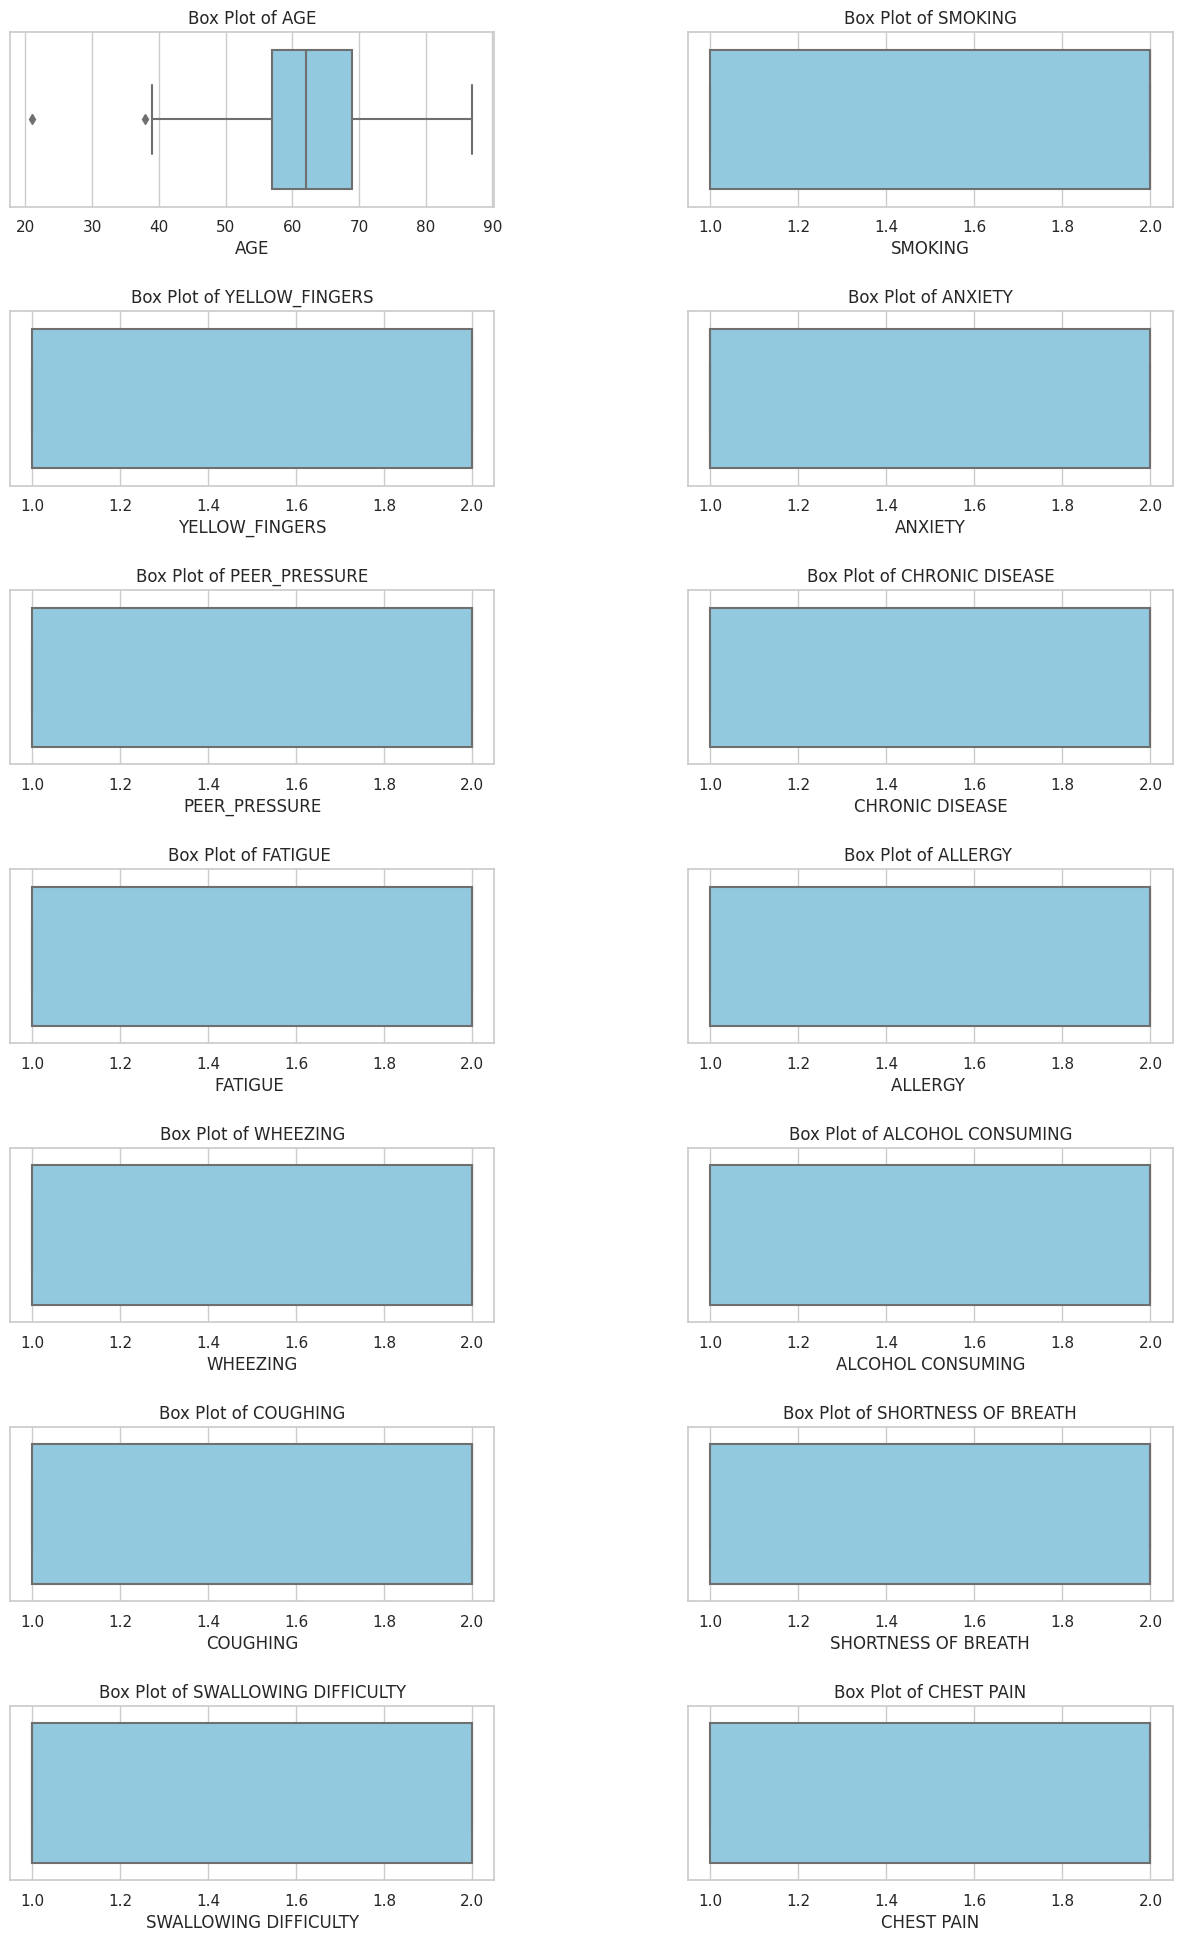

In [ ]:
# Handling Outliers with Box Plots
numerical_columns = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_columns)

# Specify the number of rows and columns based on the number of numerical columns
num_rows = (num_plots // 2) + (num_plots % 2)
num_cols = 2

plt.figure(figsize=(15, 24))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()


---